___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers.
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information.
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones.
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations.
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words
- Create Word Cloud


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews.


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [5]:
import tensorflow as tf
import os

# Note that the `tpu` argument is for Colab-only
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [6]:
strategy = tf.distribute.TPUStrategy(resolver)

In [7]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
    print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
    print('Running on GPU or CPU')

Running on TPU  ['10.102.163.218:8470']


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

import pandas as pd
import numpy as np
import re

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, precision_score, roc_curve, auc
from sklearn.metrics import average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.experimental import enable_halving_search_cv

In [9]:
from sklearn.model_selection import HalvingGridSearchCV

In [10]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [11]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


### Data Wrangling

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,23486.0,11742.500000,6779.968547,0.0,5871.25,11742.5,17613.75,23485.0
Clothing ID,23486.0,918.118709,203.298980,0.0,861.00,936.0,1078.00,1205.0
Age,23486.0,43.198544,12.279544,18.0,34.00,41.0,52.00,99.0
Rating,23486.0,4.196032,1.110031,1.0,4.00,5.0,5.00,5.0
Recommended IND,23486.0,0.822362,0.382216,0.0,1.00,1.0,1.00,1.0
Positive Feedback Count,23486.0,2.535936,5.702202,0.0,0.00,1.0,3.00,122.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


- Drop "Unnamed: 0" and "Clothing ID" because it does not has an effect on model

In [14]:
df.drop(['Unnamed: 0', 'Clothing ID'], axis = 1, inplace=True)

In [15]:
df.shape

(23486, 9)

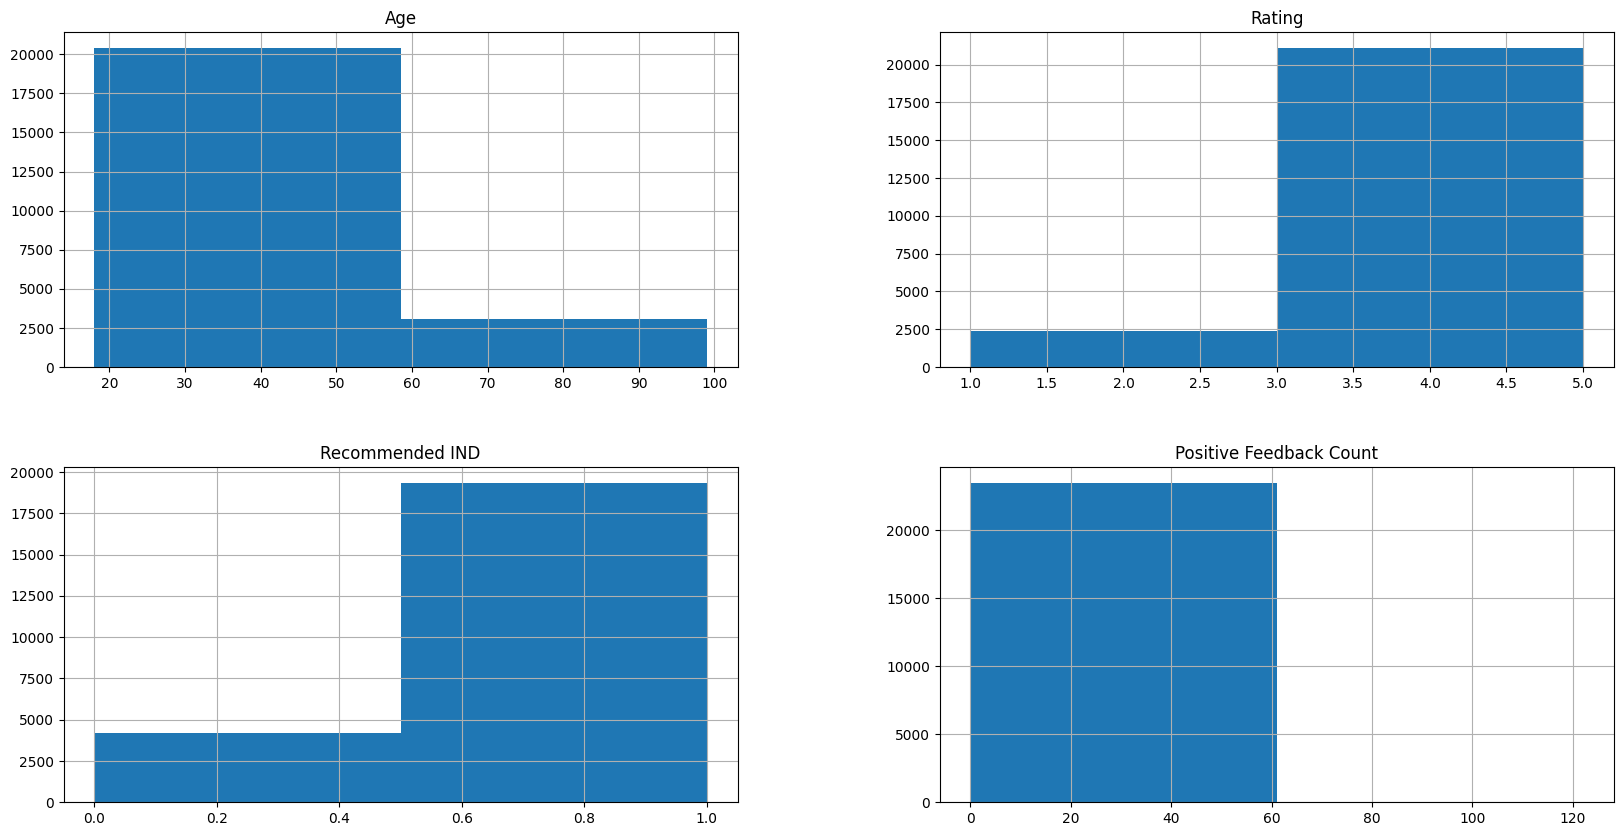

In [16]:
df.hist(bins=2, figsize=[20,10]);

<ipython-input-17-3bc28e3e9a17>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df.corr()["Recommended IND"].sort_values().drop("Recommended IND").plot(kind="barh"))


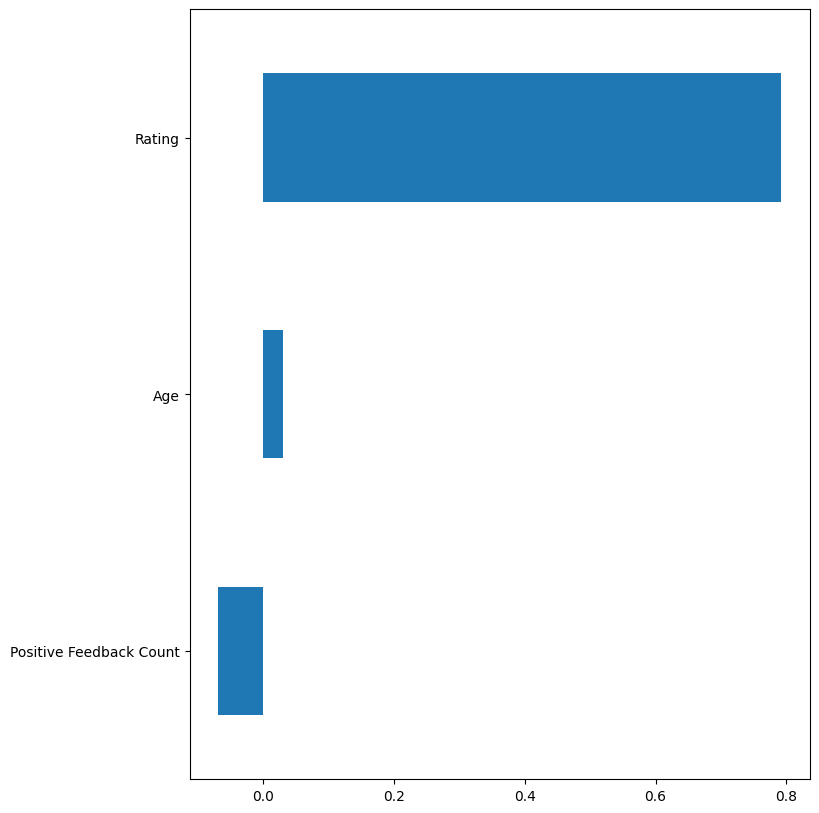

In [17]:
plt.figure(figsize=(8, 10))
(df.corr()["Recommended IND"].sort_values().drop("Recommended IND").plot(kind="barh"))
plt.show()

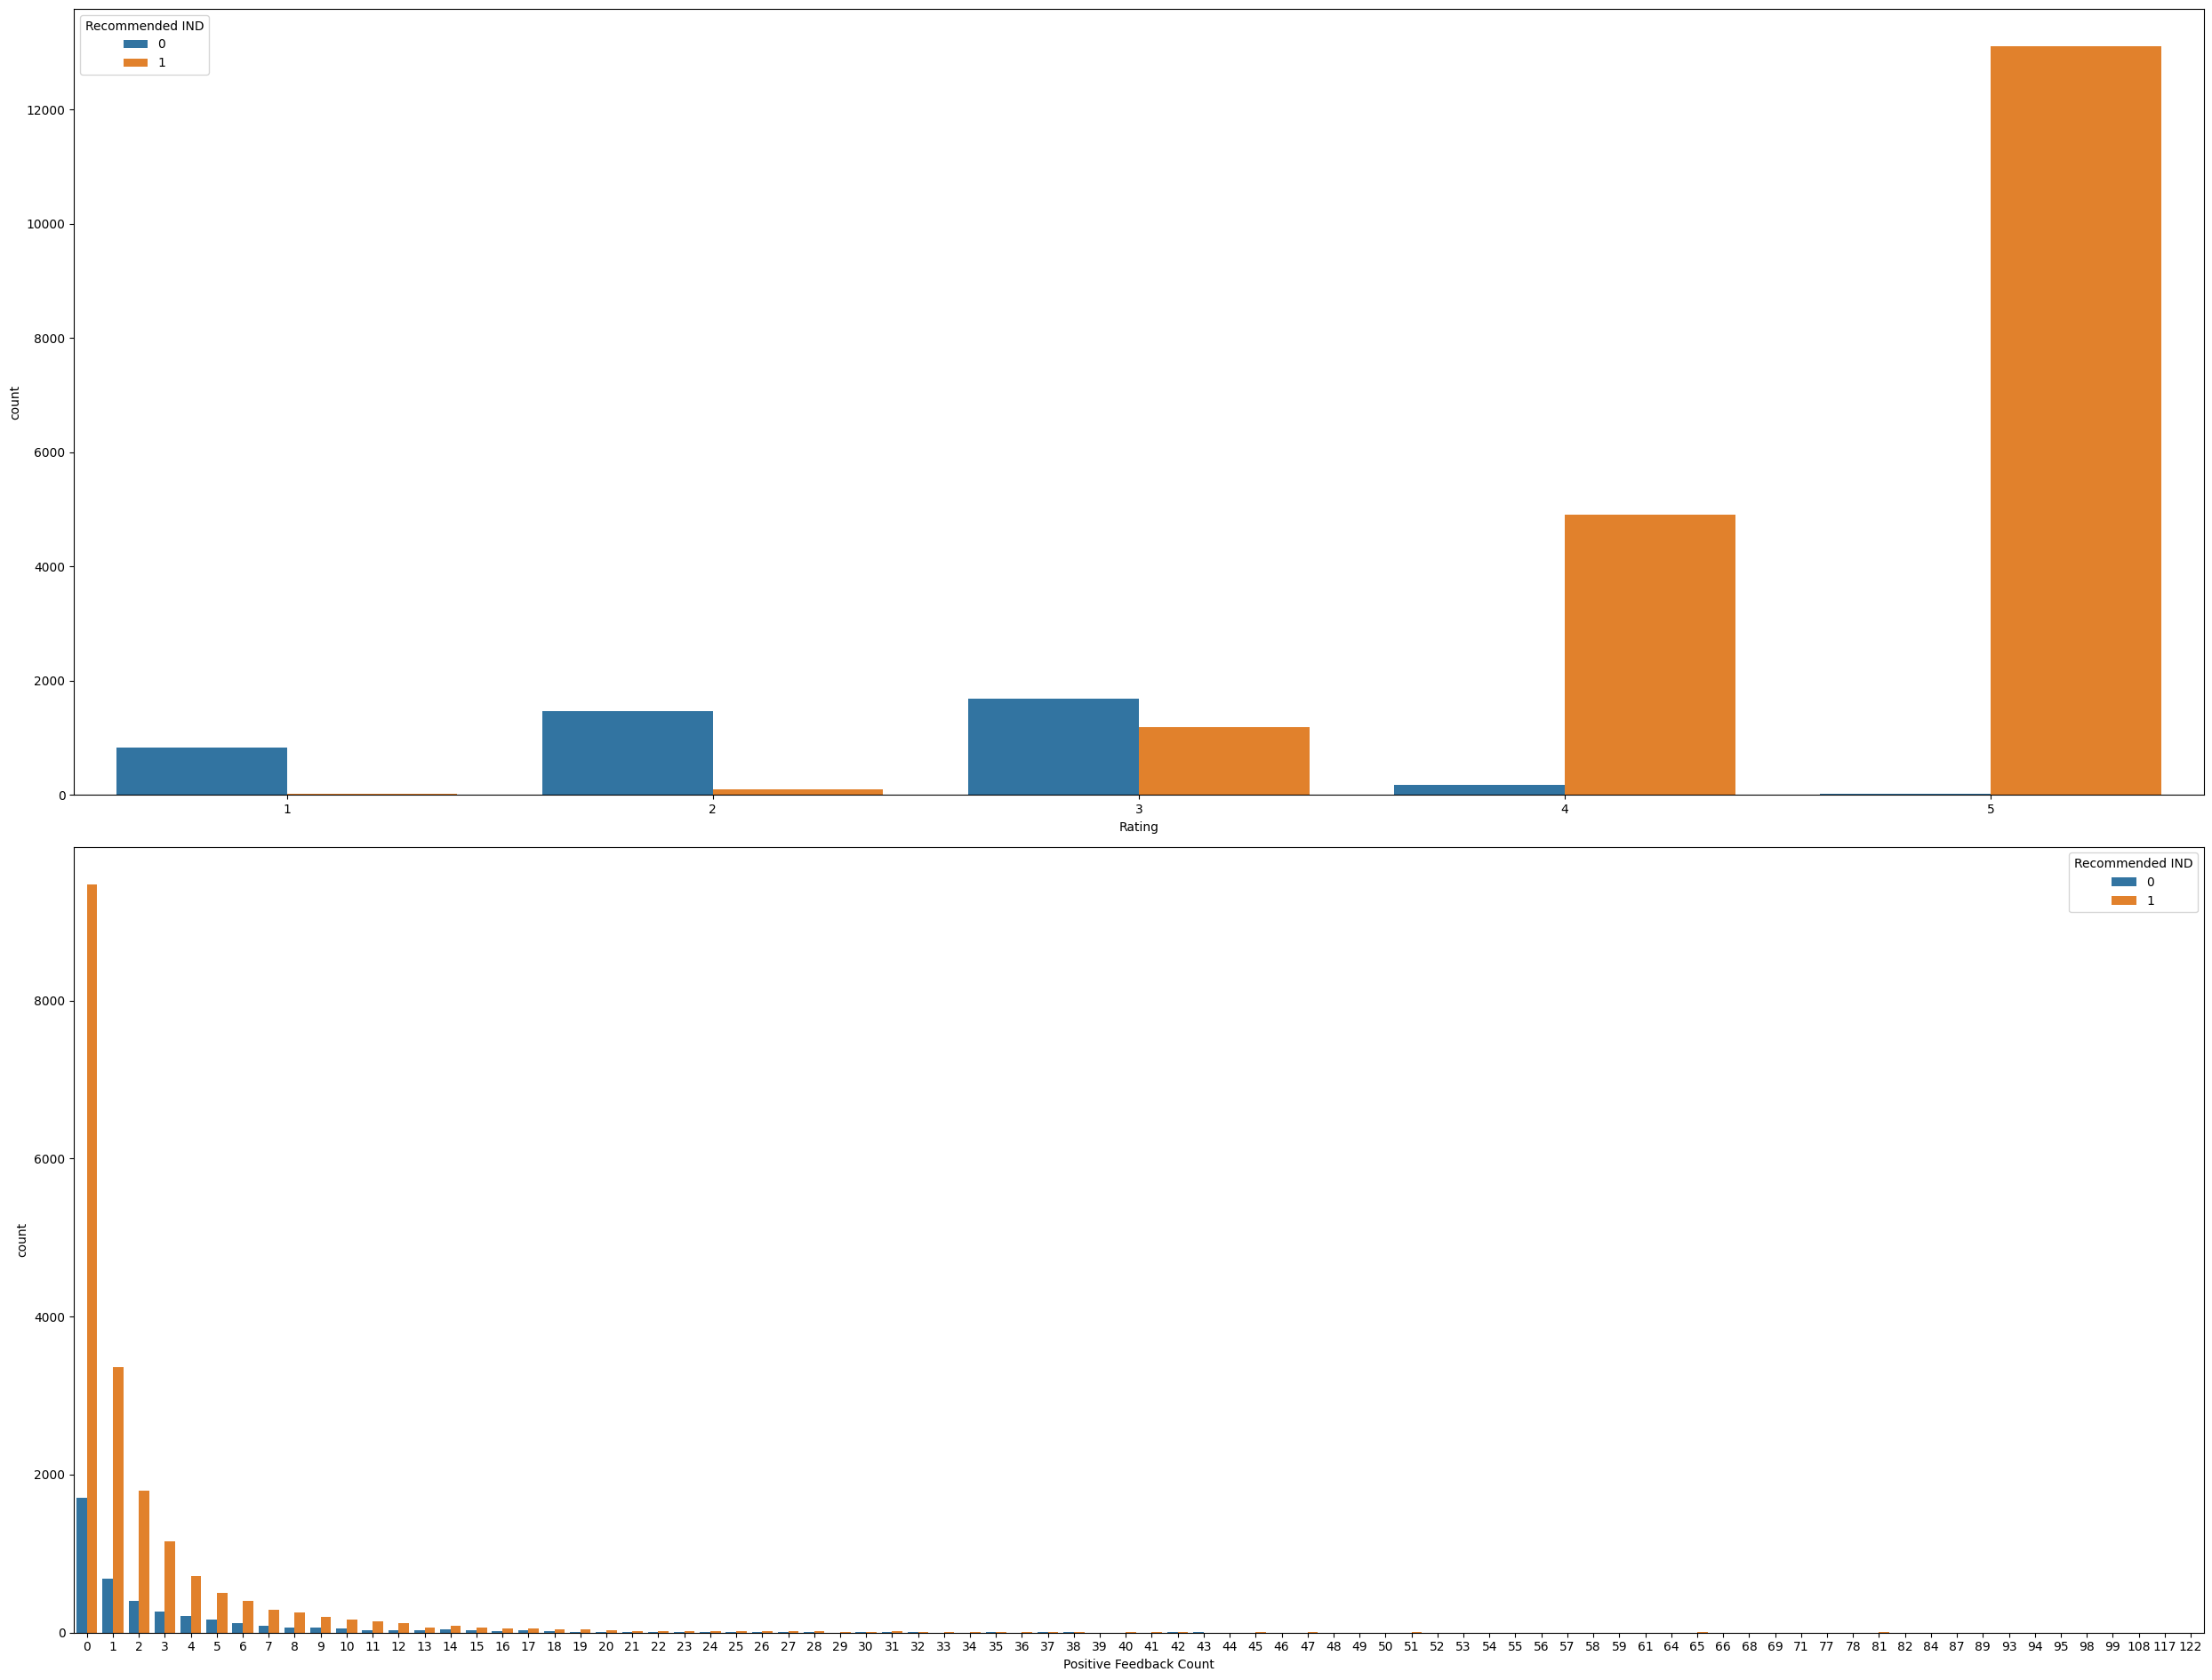

In [18]:
fig, ax = plt.subplots(2, 1, figsize=(25, 19))

sns.countplot(data=df, x='Rating', hue='Recommended IND', ax=ax[0])
sns.countplot(data=df, x='Positive Feedback Count', hue='Recommended IND', ax=ax[1])

fig.tight_layout()
plt.show()

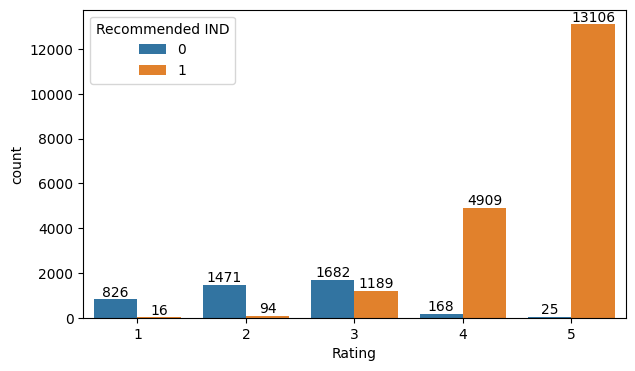

In [19]:
plt.figure(figsize = (7,4))
ax = sns.countplot(x="Rating",
                   data=df,
                   hue = "Recommended IND")
for p in ax.containers:
    ax.bar_label(p)

In [20]:
df["Recommended IND"].unique()

array([1, 0])

In [21]:
len(df[(df["Rating"] == 1) & (df["Recommended IND"] == 1)])

16

In [22]:
len(df[~((df["Rating"] == 1) & (df["Recommended IND"] == 1))])

23470

In [23]:
df = df[~((df["Rating"] == 1) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 2) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 3) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 4) & (df["Recommended IND"] == 0))]
df = df[~((df["Rating"] == 5) & (df["Recommended IND"] == 0))]

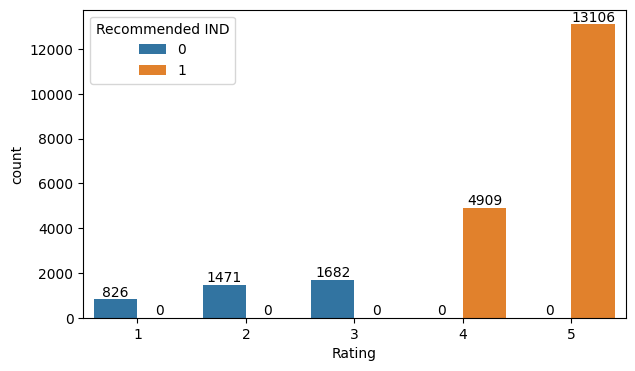

In [24]:
plt.figure(figsize = (7,4))
ax = sns.countplot(x="Rating",
                   data=df,
                   hue = "Recommended IND")
for p in ax.containers:
  ax.bar_label(p)
  #After dropping noisy data

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [25]:
df['Recommended IND'].value_counts()

1    18015
0     3979
Name: Recommended IND, dtype: int64

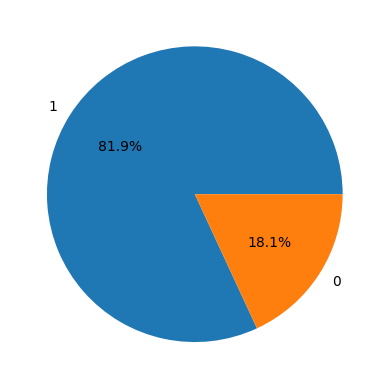

In [26]:
df['Recommended IND'].value_counts().plot(kind="pie", autopct="%1.1f%%");
plt.ylabel("");
#imbalanced

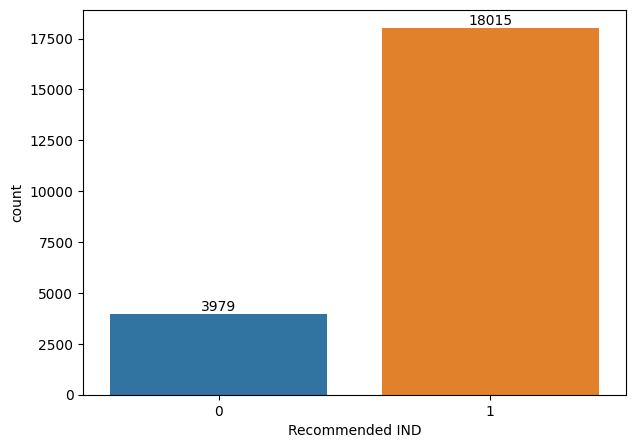

In [27]:
plt.fig = plt.figure(figsize = (7,5))
ax = sns.countplot(x="Recommended IND",
                   data=df)
ax.bar_label(ax.containers[0]);

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [28]:
df.rename(columns={"Review Text":"text",
                   "Recommended IND":"recommend"},
          inplace=True)

In [29]:
df.head(2)

,Age,Title,text,Rating,recommend,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses


In [30]:
df = df[['text','recommend']]
df.head()

,text,recommend
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


---
---


### Missing Value Detection

In [31]:
df.isnull().sum()

text         819
recommend      0
dtype: int64

In [32]:
df = df.dropna(axis=0,  how = 'all', subset=['text'])

In [33]:
df.reset_index(drop=True, inplace=True)

In [34]:
df.isnull().sum()

text         0
recommend    0
dtype: int64

In [35]:
df.duplicated().sum()

7

In [36]:
df.drop_duplicates(inplace = True)

In [37]:
df.duplicated().sum()

0

In [38]:
df.head()

,text,recommend
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


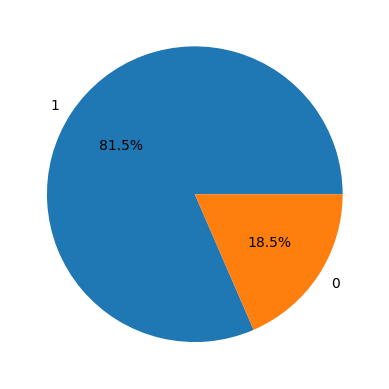

In [39]:
df['recommend'].value_counts().plot(kind="pie", autopct="%1.1f%%");
plt.ylabel("");
#imbalanced

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma).
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method.


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [40]:
stop_words = stopwords.words("english")
for i in ["not", "no"]:
        stop_words.remove(i)

In [41]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [42]:
def cleaning(data):

    import re

    #1. Removing upper brackets to keep negative auxiliary verbs in text
    data = data.replace("'", "")

    #2. Tokenize
    text_tokens = word_tokenize(data.lower())

    #3. Remove Puncs and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]

    #4. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    #5. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]


    #6. joining
    return " ".join( text_cleaned)

In [43]:
df['text'].apply(cleaning)

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store im ...
2        high hope dress really wanted work initially o...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
                               ...                        
21170    surprised positive review product terrible cut...
21171    wasnt sure ordering skirt couldnt see person f...
21172    happy snag dress great price easy slip flatter...
21173    fit well top see never would worked im glad ab...
21174    dress lovely platinum feminine fit perfectly e...
Name: text, Length: 21168, dtype: object

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21168 entries, 0 to 21174
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       21168 non-null  object
 1   recommend  21168 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 496.1+ KB


In [45]:
df.duplicated().sum()

0

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words
- Create Word Cloud


### Detect Reviews (positive and negative separately)

In [46]:
from wordcloud import WordCloud

In [47]:
df[df["recommend"] == 0].head()

,text,recommend
2,I had such high hopes for this dress and reall...,0
5,"I love tracy reese dresses, but this one is no...",0
10,Dress runs small esp where the zipper area run...,0
20,"First of all, this is not pullover styling. th...",0
22,"Loved the material, but i didnt really look at...",0


In [48]:
df[df["recommend"] == 1].head()

,text,recommend
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
6,I aded this in my basket at hte last mintue to...,1


### Collect Words (positive and negative separately)

In [49]:
positive_words = df.loc[df['recommend'] == 1]

In [50]:
positive_words.head()

,text,recommend
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
6,I aded this in my basket at hte last mintue to...,1


In [51]:
positives = " ".join(positive_words['text'])

In [52]:
negative_words = df.loc[df['recommend'] == 0]

In [53]:
negative_words.head()

,text,recommend
2,I had such high hopes for this dress and reall...,0
5,"I love tracy reese dresses, but this one is no...",0
10,Dress runs small esp where the zipper area run...,0
20,"First of all, this is not pullover styling. th...",0
22,"Loved the material, but i didnt really look at...",0


In [54]:
negatives = " ".join(negative_words['text'])

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

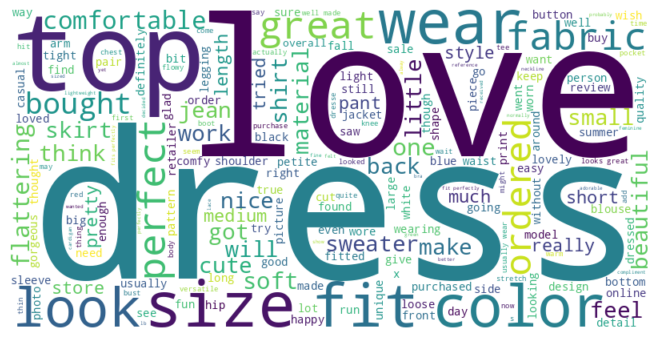

In [55]:
plt.axis("off")
#making the wordCloud
wordcloud_p = WordCloud( background_color="white", width=800, height=400).generate(positives)
plt.tight_layout(pad=0)
#displaying wordCloud
plt.imshow(wordcloud_p, interpolation='bilinear')
plt.show()

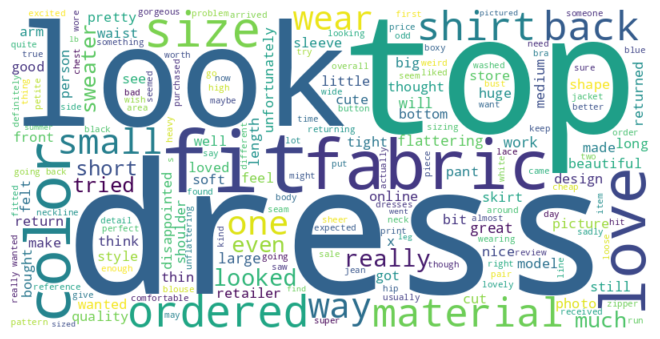

In [56]:
plt.axis("off")
#making the wordCloud
wordcloud_n = WordCloud( background_color="white", width=800, height=400).generate(negatives)
plt.tight_layout(pad=0)
#displaying wordCloud
plt.imshow(wordcloud_n, interpolation='bilinear')
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.**

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [57]:
X = df["text"]
y = df["recommend"]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

### Count Vectorization

In [59]:
vectorizer = CountVectorizer(preprocessor = cleaning, min_df = 3)
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [60]:
df_train_count_vic = pd.DataFrame(X_train_count.toarray(),
                                  columns = vectorizer.get_feature_names_out(),
                                  index= X_train.index)
df_test_count_vic = pd.DataFrame(X_test_count.toarray(),
                                 columns = vectorizer.get_feature_names_out(),
                                 index= X_test.index)

### TF-IDF

In [61]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor = cleaning, min_df = 3)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [62]:
df_train_tfidf = pd.DataFrame(X_train_tf_idf.toarray(),
                              columns = tf_idf_vectorizer.get_feature_names_out(),
                              index= X_train.index)

df_test_tfidf = pd.DataFrame(X_test_tf_idf.toarray(),
                             columns = tf_idf_vectorizer.get_feature_names_out(),
                             index= X_test.index)

### Eval Function

In [63]:
#confusion matrix
def eval_metric(model, X_train, y_train, X_test, y_test):

    """ to get the metrics for the model """

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("\tTest_Set\n")
    fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred), show_normed = True, figsize=(6, 6))
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()
    print(classification_report(y_test, y_pred))
    print()
    print("\tTrain_Set\n")
    fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_train, y_train_pred), show_normed = True, figsize=(6, 6))
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()
    print()
    print(classification_report(y_train, y_train_pred))

In [64]:
#roc curve
def roc_auc_plot(model, y_train, X_train, y_test, X_test):
    pred_train = model.predict(X_train).ravel()
    pred_test = model.predict(X_test).ravel()
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_train, pred_train)
    fpr_keras_test, tpr_keras_test, thresholds_keras_test = roc_curve(y_test, pred_test)


    auc_keras = auc(fpr_keras, tpr_keras)
    auc_keras_test = auc(fpr_keras_test, tpr_keras_test)


    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_keras, tpr_keras, label='train (area = {:.3f})'.format(auc_keras))
    plt.plot(fpr_keras_test, tpr_keras_test, label='val (area = {:.3f})'.format(auc_keras_test))

    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

In [65]:
def eval_scores(model, X_train, y_train):
    scoring = {'accuracy': make_scorer(accuracy_score),
            'precision': make_scorer(precision_score, average=None, labels=[0]),
            'recall': make_scorer(recall_score, average=None, labels = [0]),
            'f1': make_scorer(f1_score, average=None, labels = [0])}

    scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 5, return_train_score=True, n_jobs = -1)
    df_scores = pd.DataFrame(scores, index = range(1,6))
    return df_scores

## Logistic Regression

### CountVectorizer

In [66]:
logisitc_model = LogisticRegression(max_iter = 10000)

In [67]:
logisitc_model.fit(X_train_count, y_train)

LogisticRegression(max_iter=10000)

In [68]:
logistic_scores = eval_scores(logisitc_model, X_train_count, y_train)
logistic_scores.mean()[2:]

# There is an overfitting

test_accuracy      0.907524
train_accuracy     0.964332
test_precision     0.780924
train_precision    0.935677
test_recall        0.694569
train_recall       0.866613
test_f1            0.735113
train_f1           0.899815
dtype: float64

	Test_Set



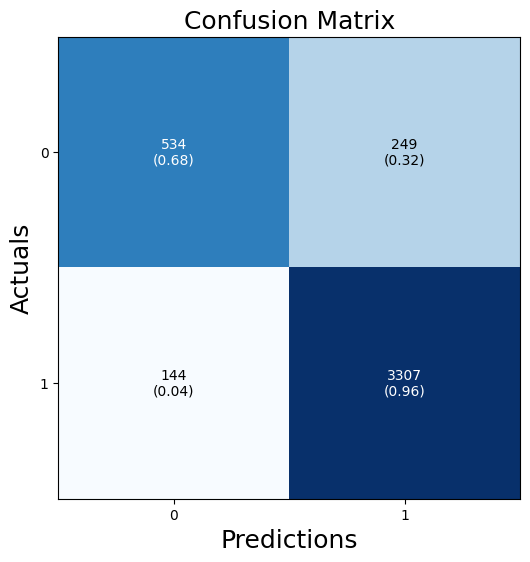

              precision    recall  f1-score   support

           0       0.79      0.68      0.73       783
           1       0.93      0.96      0.94      3451

    accuracy                           0.91      4234
   macro avg       0.86      0.82      0.84      4234
weighted avg       0.90      0.91      0.90      4234


	Train_Set



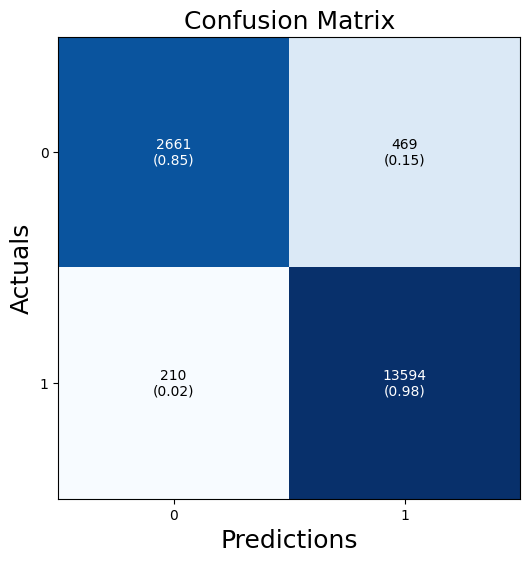


              precision    recall  f1-score   support

           0       0.93      0.85      0.89      3130
           1       0.97      0.98      0.98     13804

    accuracy                           0.96     16934
   macro avg       0.95      0.92      0.93     16934
weighted avg       0.96      0.96      0.96     16934



In [69]:
eval_metric(logisitc_model, X_train_count, y_train, X_test_count, y_test)

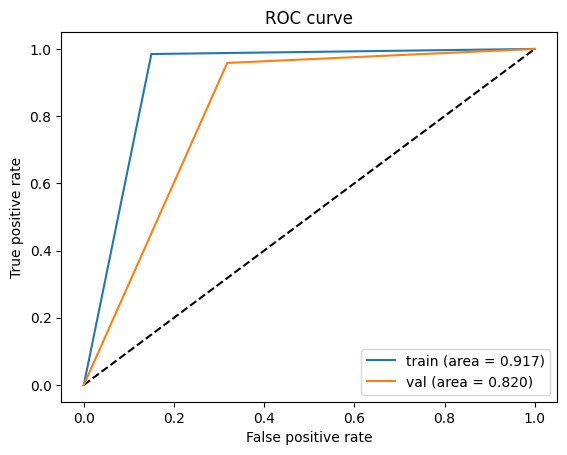

In [70]:
roc_auc_plot(logisitc_model, y_train, X_train_count, y_test, X_test_count)

In [71]:
y_pred = logisitc_model.predict(X_test_count)
y_pred_proba= logisitc_model.predict_proba(X_test_count)[:,1]
log_AP_count = average_precision_score(y_test, y_pred_proba)
log_count_rec = recall_score(y_test, y_pred)
log_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [72]:
logisitc_model_tf = LogisticRegression(max_iter = 10000)

In [73]:
logisitc_model_tf.fit(X_train_tf_idf, y_train)

LogisticRegression(max_iter=10000)

In [74]:
logistic_scores_tf_idf = eval_scores(logisitc_model_tf, X_train_tf_idf, y_train)
logistic_scores_tf_idf.mean()[2:]
#Tere is an overfitting

test_accuracy      0.903862
train_accuracy     0.926258
test_precision     0.844522
train_precision    0.900640
test_recall        0.588179
train_recall       0.675559
test_f1            0.693224
train_f1           0.772012
dtype: float64

	Test_Set



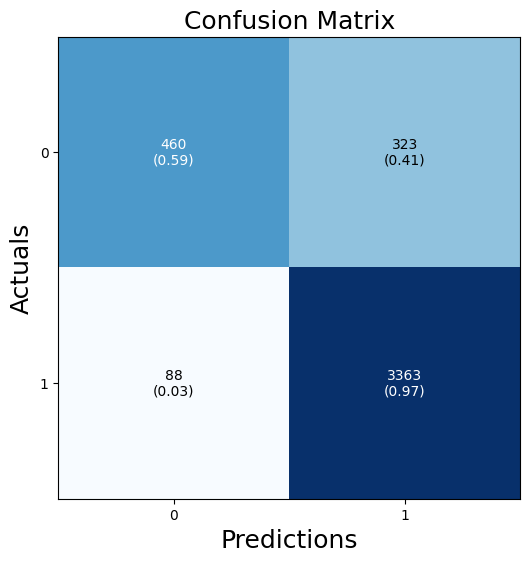

              precision    recall  f1-score   support

           0       0.84      0.59      0.69       783
           1       0.91      0.97      0.94      3451

    accuracy                           0.90      4234
   macro avg       0.88      0.78      0.82      4234
weighted avg       0.90      0.90      0.90      4234


	Train_Set



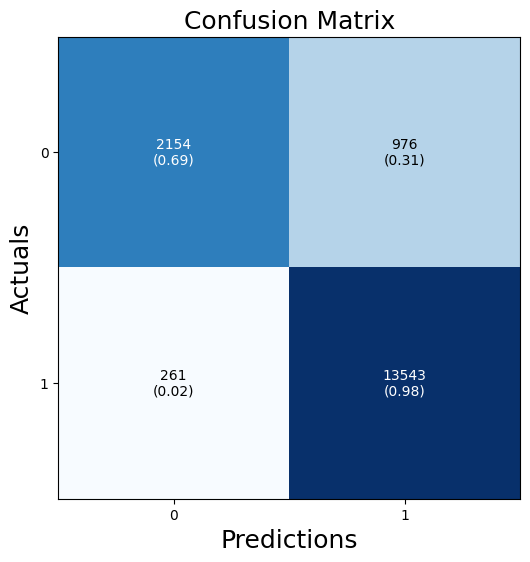


              precision    recall  f1-score   support

           0       0.89      0.69      0.78      3130
           1       0.93      0.98      0.96     13804

    accuracy                           0.93     16934
   macro avg       0.91      0.83      0.87     16934
weighted avg       0.93      0.93      0.92     16934



In [75]:
eval_metric(logisitc_model_tf, X_train_tf_idf, y_train, X_test_tf_idf, y_test)

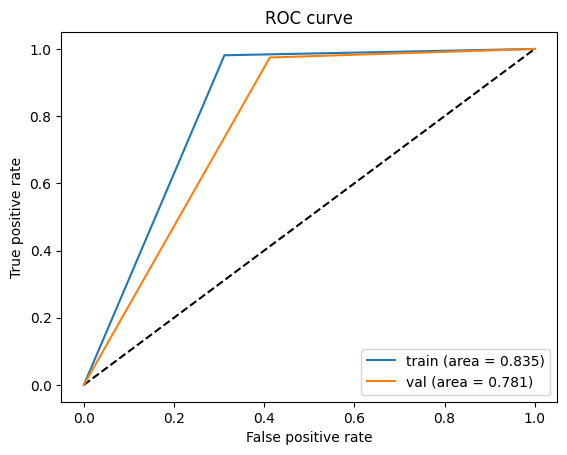

In [76]:
roc_auc_plot(logisitc_model_tf, y_train, X_train_tf_idf, y_test, X_test_tf_idf)

In [77]:
y_pred = logisitc_model_tf.predict(X_test_tf_idf)
y_pred_proba= logisitc_model_tf.predict_proba(X_test_tf_idf)[:,1]
log_AP_tf = average_precision_score(y_test, y_pred_proba)
log_tf_rec = recall_score(y_test, y_pred)
log_td_f1 = f1_score(y_test,y_pred)

### Gridsearch

In [78]:
LogisticRegression?

In [79]:
parameters_lr = [{'C': [0.1, 0.5, 1],
                  'penalty':['l2', 'l1'],
                  'class_weight':['balanced'],
                  'solver':['liblinear', 'saga'],
                  'max_iter':[10000]}]

logistic_model_gs = LogisticRegression()

recall = make_scorer(recall_score,
                   average=None,
                   labels = [0])

grid_search_lr = HalvingGridSearchCV(logistic_model_gs,
                                     parameters_lr,
                                     max_resources=20,
                                     scoring = recall,
                                     cv = 5,
                                     n_jobs = -1,
                                     random_state=0)

grid_search_lr.fit(X_train_count,
                   y_train)

best_accuracy_lr = grid_search_lr.best_score_

best_paramaeter_lr = grid_search_lr.best_params_

print("Best class 0 recall-score of LR: {:.2f} %".format(best_accuracy_lr.mean()*100))

print("Best Parameter of LR:", best_paramaeter_lr)

Best class 0 recall-score of LR: 60.00 %
Best Parameter of LR: {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 10000, 'penalty': 'l1', 'solver': 'liblinear'}


In [80]:
logistic_scores_op = eval_scores(grid_search_lr, X_train_count, y_train)
logistic_scores_op.mean()[2:]

test_accuracy      0.882012
train_accuracy     0.906667
test_precision     0.634023
train_precision    0.684123
test_recall        0.861342
train_recall       0.924441
test_f1            0.730001
train_f1           0.786125
dtype: float64

	Test_Set



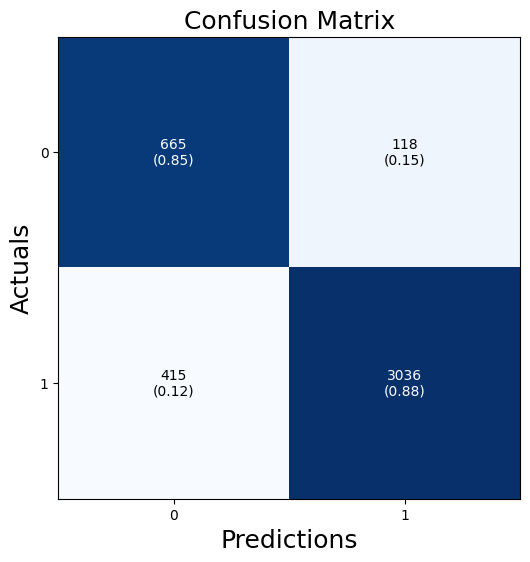

              precision    recall  f1-score   support

           0       0.62      0.85      0.71       783
           1       0.96      0.88      0.92      3451

    accuracy                           0.87      4234
   macro avg       0.79      0.86      0.82      4234
weighted avg       0.90      0.87      0.88      4234


	Train_Set



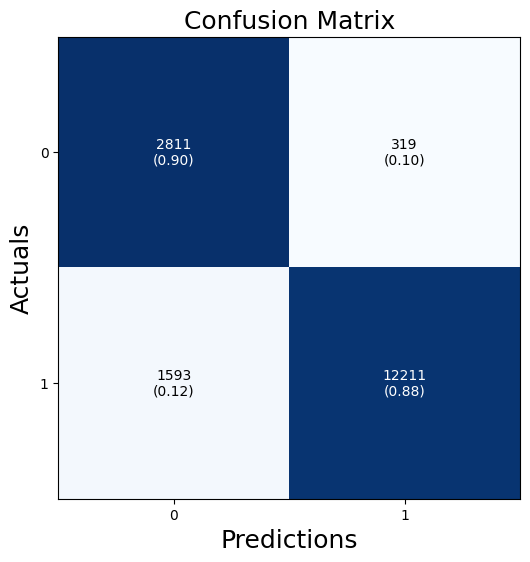


              precision    recall  f1-score   support

           0       0.64      0.90      0.75      3130
           1       0.97      0.88      0.93     13804

    accuracy                           0.89     16934
   macro avg       0.81      0.89      0.84     16934
weighted avg       0.91      0.89      0.89     16934



In [81]:
eval_metric(grid_search_lr, X_train_count, y_train, X_test_count, y_test)

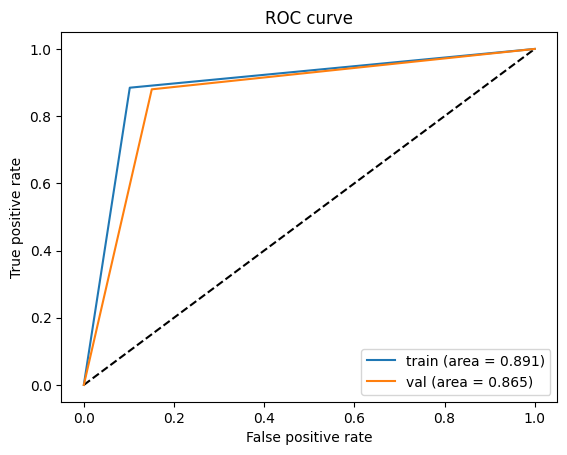

In [82]:
roc_auc_plot(grid_search_lr, y_train, X_train_count, y_test, X_test_count)

## Naive Bayes

### Countvectorizer

In [83]:
nb_count = BernoulliNB()

In [84]:
nb_count.fit(X_train_count, y_train)

BernoulliNB()

In [85]:
nb_scores = eval_scores(nb_count, X_train_count, y_train)
nb_scores.mean()[2:]
# not overfit to much

test_accuracy      0.896481
train_accuracy     0.918788
test_precision     0.702407
train_precision    0.757819
test_recall        0.763578
train_recall       0.823962
test_f1            0.731706
train_f1           0.789505
dtype: float64

	Test_Set



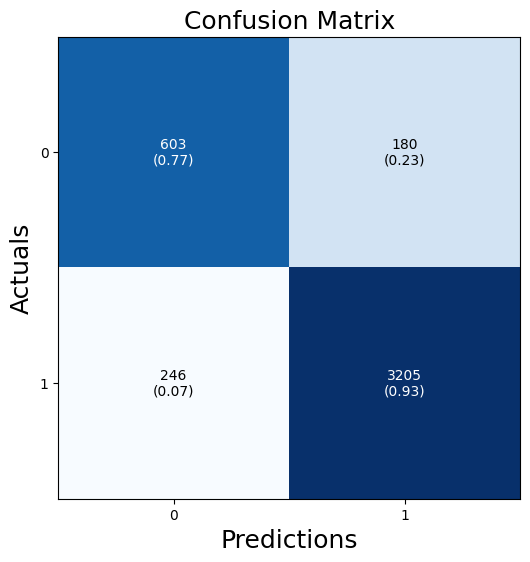

              precision    recall  f1-score   support

           0       0.71      0.77      0.74       783
           1       0.95      0.93      0.94      3451

    accuracy                           0.90      4234
   macro avg       0.83      0.85      0.84      4234
weighted avg       0.90      0.90      0.90      4234


	Train_Set



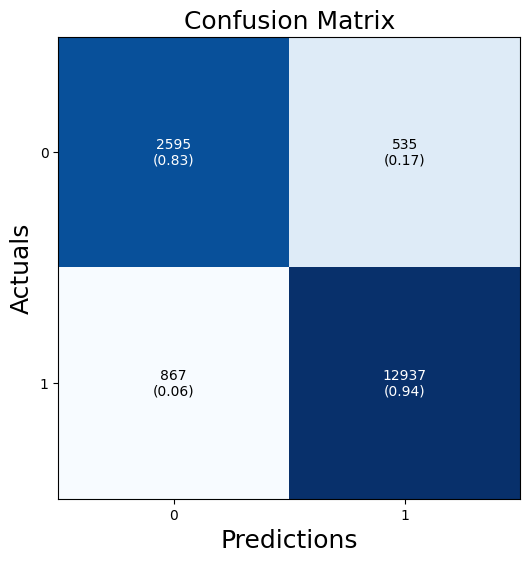


              precision    recall  f1-score   support

           0       0.75      0.83      0.79      3130
           1       0.96      0.94      0.95     13804

    accuracy                           0.92     16934
   macro avg       0.85      0.88      0.87     16934
weighted avg       0.92      0.92      0.92     16934



In [86]:
eval_metric(nb_count, X_train_count, y_train, X_test_count, y_test)

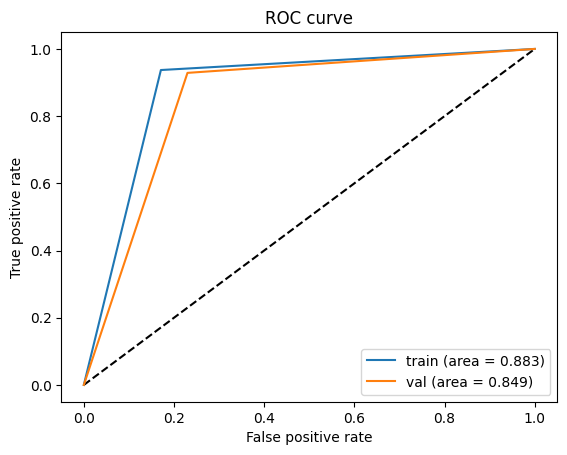

In [87]:
roc_auc_plot(nb_count, y_train, X_train_count, y_test, X_test_count)

In [88]:
y_pred = nb_count.predict(X_test_count)
y_pred_proba= nb_count.predict_proba(X_test_count)[:,1]
nb_AP_count = average_precision_score(y_test, y_pred_proba)
nb_count_rec = recall_score(y_test, y_pred)
nb_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [89]:
nb_count_tf = BernoulliNB()

In [90]:
nb_count_tf.fit(X_train_tf_idf, y_train)

BernoulliNB()

In [91]:
nb_scores_tf = eval_scores(nb_count_tf, X_train_tf_idf, y_train)
nb_scores_tf.mean()[2:]
# not overfit to much

test_accuracy      0.896481
train_accuracy     0.918788
test_precision     0.702407
train_precision    0.757819
test_recall        0.763578
train_recall       0.823962
test_f1            0.731706
train_f1           0.789505
dtype: float64

	Test_Set



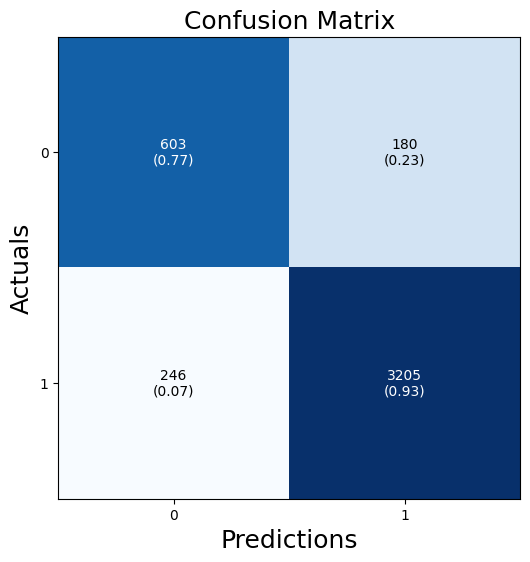

              precision    recall  f1-score   support

           0       0.71      0.77      0.74       783
           1       0.95      0.93      0.94      3451

    accuracy                           0.90      4234
   macro avg       0.83      0.85      0.84      4234
weighted avg       0.90      0.90      0.90      4234


	Train_Set



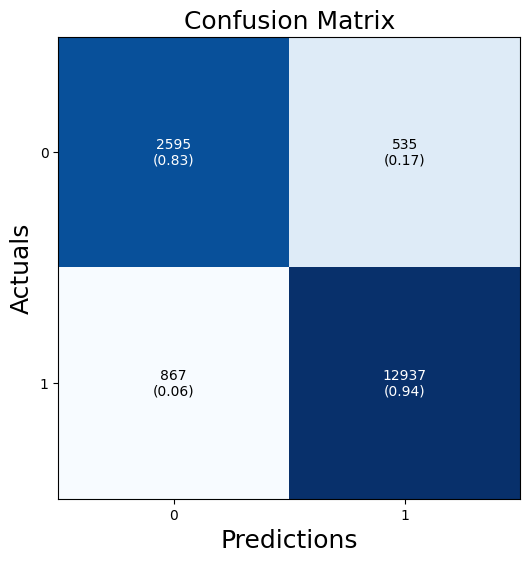


              precision    recall  f1-score   support

           0       0.75      0.83      0.79      3130
           1       0.96      0.94      0.95     13804

    accuracy                           0.92     16934
   macro avg       0.85      0.88      0.87     16934
weighted avg       0.92      0.92      0.92     16934



In [92]:
eval_metric(nb_count_tf, X_train_tf_idf, y_train, X_test_tf_idf, y_test)

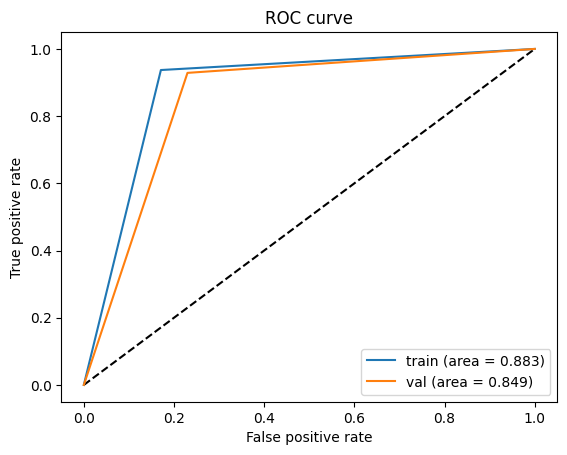

In [93]:
roc_auc_plot(nb_count_tf, y_train, X_train_tf_idf, y_test, X_test_tf_idf)

In [94]:
y_pred = nb_count_tf.predict(X_test_tf_idf)
y_pred_proba= nb_count_tf.predict_proba(X_test_tf_idf)[:,1]
nb_AP_tf = average_precision_score(y_test, y_pred_proba)
nb_tf_rec = recall_score(y_test, y_pred)
nb_td_f1 = f1_score(y_test,y_pred)

## Support Vector Machine (SVM)

### Countvectorizer

In [95]:
svm = SVC()

In [96]:
svm.fit(X_train_count, y_train)

SVC()

In [97]:
svm_scores = eval_scores(svm, X_train_count, y_train)
svm_scores.mean()[2:]
#There is an overfitting

test_accuracy      0.905338
train_accuracy     0.974120
test_precision     0.842699
train_precision    0.968667
test_recall        0.599681
train_recall       0.888738
test_f1            0.700543
train_f1           0.926978
dtype: float64

	Test_Set



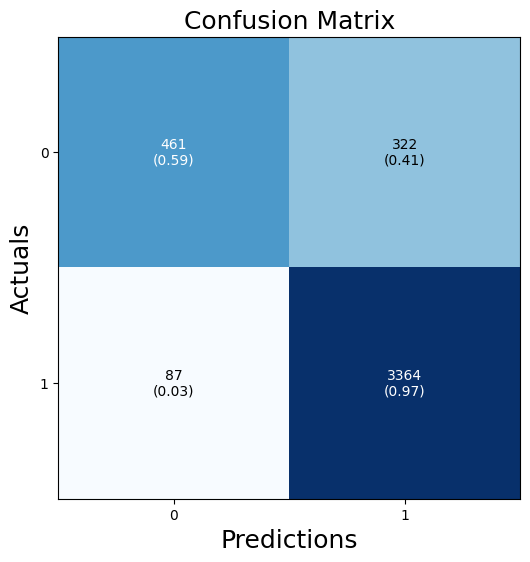

              precision    recall  f1-score   support

           0       0.84      0.59      0.69       783
           1       0.91      0.97      0.94      3451

    accuracy                           0.90      4234
   macro avg       0.88      0.78      0.82      4234
weighted avg       0.90      0.90      0.90      4234


	Train_Set



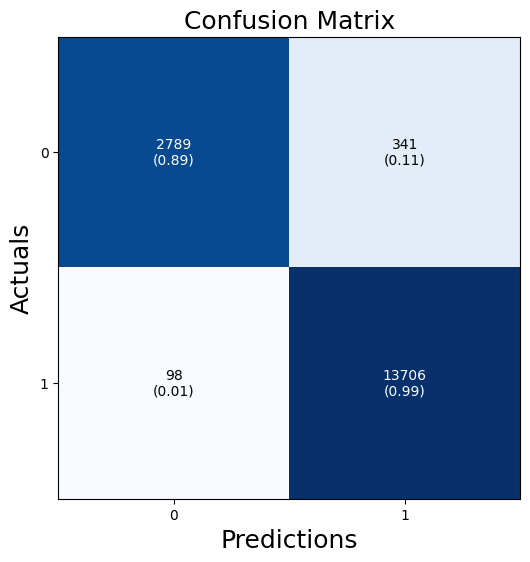


              precision    recall  f1-score   support

           0       0.97      0.89      0.93      3130
           1       0.98      0.99      0.98     13804

    accuracy                           0.97     16934
   macro avg       0.97      0.94      0.96     16934
weighted avg       0.97      0.97      0.97     16934



In [98]:
eval_metric(svm, X_train_count, y_train, X_test_count, y_test)

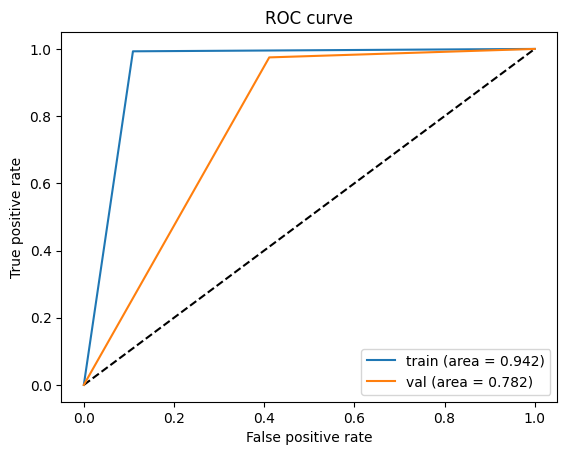

In [99]:
roc_auc_plot(svm, y_train, X_train_count, y_test, X_test_count)

In [100]:
y_pred = svm.predict(X_test_count)
decision_function= svm.decision_function(X_test_count)

svm_AP_count = average_precision_score(y_test, y_pred_proba)
svm_count_rec = recall_score(y_test, y_pred)
svm_count_f1 = f1_score(y_test,y_pred)

### TD-IDF

In [101]:
svm_tf = SVC()

In [102]:
svm_tf.fit(X_train_tf_idf, y_train)

SVC()

In [103]:
svm_scores_tf = eval_scores(svm_tf, X_train_tf_idf, y_train)
svm_scores_tf.mean()[2:]
#There is an overfitting

test_accuracy      0.909059
train_accuracy     0.985178
test_precision     0.846457
train_precision    0.984766
test_recall        0.620767
train_recall       0.934265
test_f1            0.715981
train_f1           0.958848
dtype: float64

	Test_Set



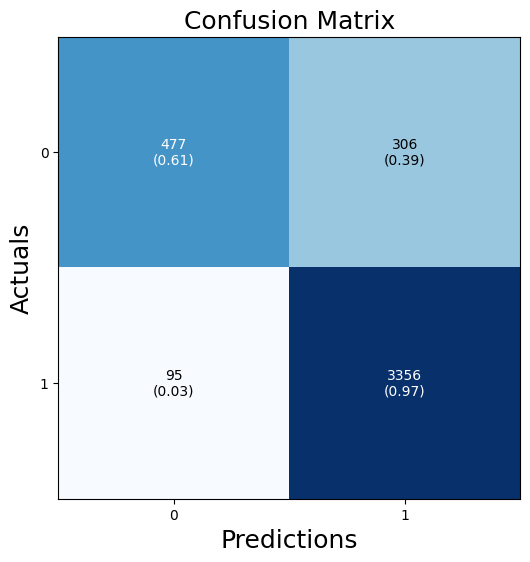

              precision    recall  f1-score   support

           0       0.83      0.61      0.70       783
           1       0.92      0.97      0.94      3451

    accuracy                           0.91      4234
   macro avg       0.88      0.79      0.82      4234
weighted avg       0.90      0.91      0.90      4234


	Train_Set



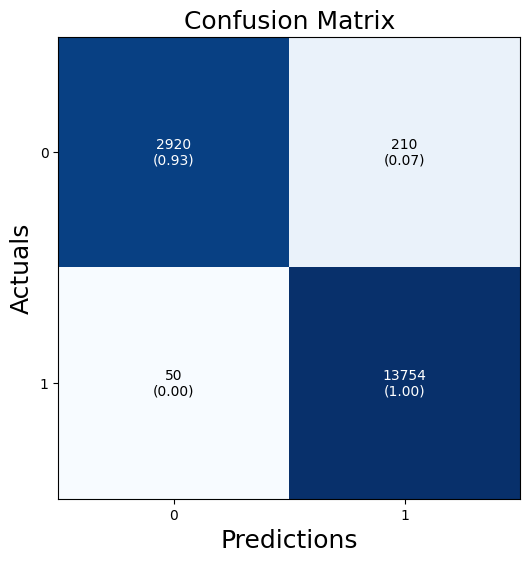


              precision    recall  f1-score   support

           0       0.98      0.93      0.96      3130
           1       0.98      1.00      0.99     13804

    accuracy                           0.98     16934
   macro avg       0.98      0.96      0.97     16934
weighted avg       0.98      0.98      0.98     16934



In [104]:
eval_metric(svm_tf, X_train_tf_idf, y_train, X_test_tf_idf, y_test)

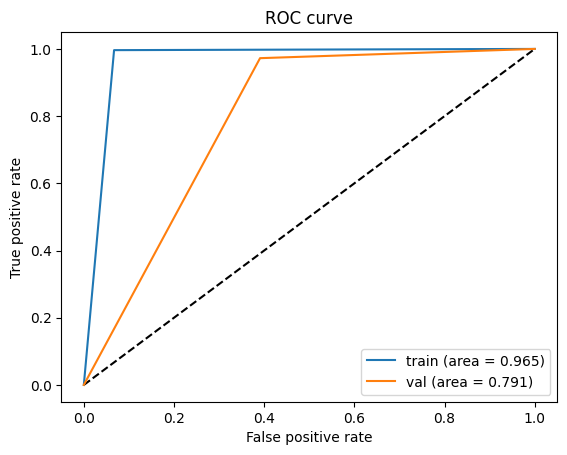

In [105]:
roc_auc_plot(svm_tf, y_train, X_train_tf_idf, y_test, X_test_tf_idf)

In [106]:
y_pred = svm_tf.predict(X_test_tf_idf)
decision_function= svm_tf.decision_function(X_test_tf_idf)

svm_AP_tf = average_precision_score(y_test, y_pred_proba)
svm_tf_rec = recall_score(y_test, y_pred)
svm_td_f1 = f1_score(y_test,y_pred)

### Gridsearch

In [107]:
SVC?

In [108]:
parameters_svc = [{'C': [0.1, 1, 10],
                   'kernel': ['linear', 'rbf'],
                   'class_weight': ['balanced', None]}]

svc_model_gs = SVC()
recall = make_scorer(recall_score,
                   average=None,
                   labels=[0])
grid_search_svc = HalvingGridSearchCV(svc_model_gs,
                                      parameters_svc,
                                      max_resources=20,
                                      scoring=recall,
                                      cv=5,
                                      n_jobs=-1,
                                      random_state=0)

grid_search_svc.fit(X_train_tf_idf,
                    y_train)
best_accuracy_svc = grid_search_svc.best_score_
best_parameter_svc = grid_search_svc.best_params_
print("Best class 0 recall-score of SVC: {:.2f} %".format(best_accuracy_svc.mean() * 100))
print("Best Parameter of SVC:", best_parameter_svc)


Best class 0 recall-score of SVC: 20.00 %
Best Parameter of SVC: {'C': 0.1, 'class_weight': 'balanced', 'kernel': 'linear'}


In [109]:
SVC_scores_op = eval_scores(grid_search_svc, X_train_tf_idf, y_train)
SVC_scores_op.mean()[2:]

test_accuracy      0.878115
train_accuracy     0.891933
test_precision     0.617775
train_precision    0.643107
test_recall        0.893291
train_recall       0.933466
test_f1            0.730401
train_f1           0.761531
dtype: float64

	Test_Set



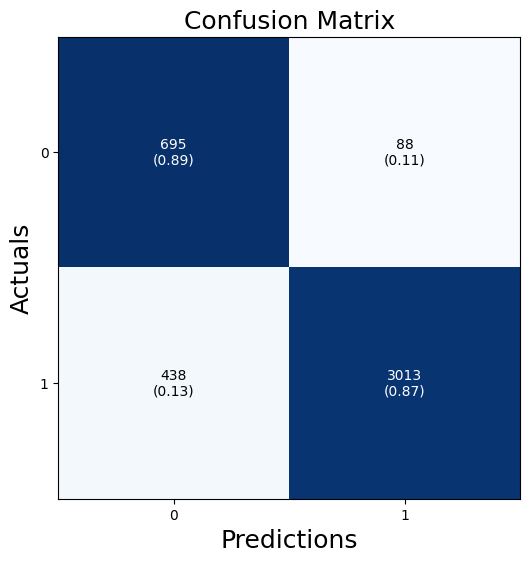

              precision    recall  f1-score   support

           0       0.61      0.89      0.73       783
           1       0.97      0.87      0.92      3451

    accuracy                           0.88      4234
   macro avg       0.79      0.88      0.82      4234
weighted avg       0.91      0.88      0.88      4234


	Train_Set



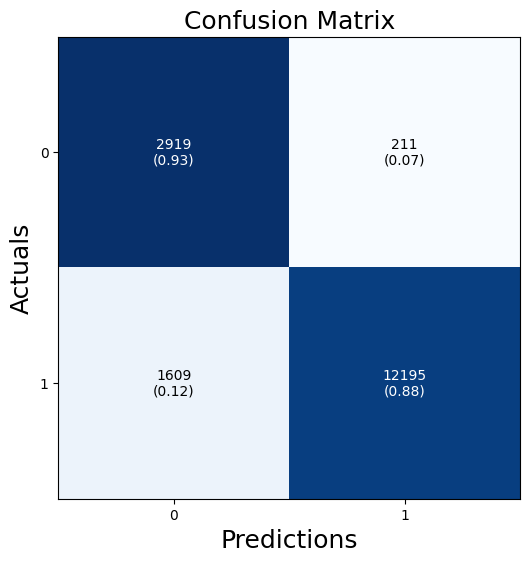


              precision    recall  f1-score   support

           0       0.64      0.93      0.76      3130
           1       0.98      0.88      0.93     13804

    accuracy                           0.89     16934
   macro avg       0.81      0.91      0.85     16934
weighted avg       0.92      0.89      0.90     16934



In [110]:
eval_metric(grid_search_svc, X_train_tf_idf, y_train, X_test_tf_idf, y_test)

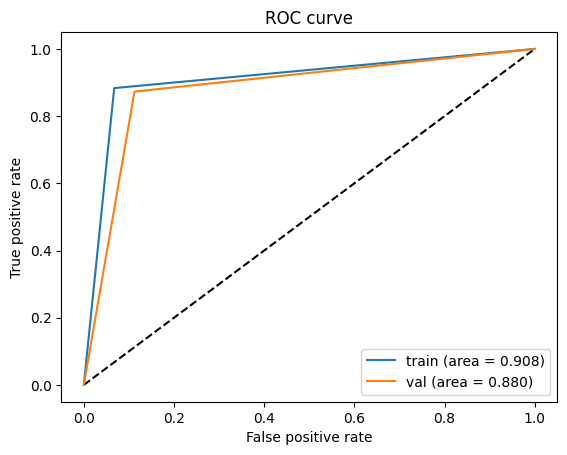

In [111]:
roc_auc_plot(grid_search_svc, y_train, X_train_tf_idf, y_test, X_test_tf_idf)

## Random Forest

### Countvectorizer

In [112]:
rf_count = RandomForestClassifier()

In [113]:
rf_count.fit(X_train_count, y_train)

RandomForestClassifier()

In [114]:
rf_scores = eval_scores(rf_count, X_train_count, y_train)
rf_scores.mean()[2:]

test_accuracy      0.870556
train_accuracy     1.000000
test_precision     0.878677
train_precision    1.000000
test_recall        0.347604
train_recall       1.000000
test_f1            0.497997
train_f1           1.000000
dtype: float64

	Test_Set



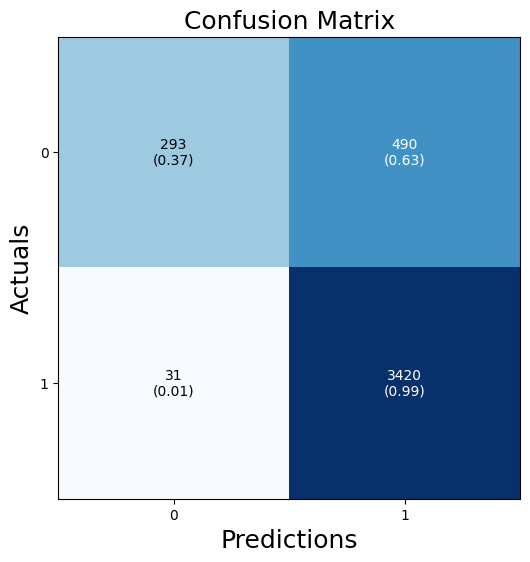

              precision    recall  f1-score   support

           0       0.90      0.37      0.53       783
           1       0.87      0.99      0.93      3451

    accuracy                           0.88      4234
   macro avg       0.89      0.68      0.73      4234
weighted avg       0.88      0.88      0.86      4234


	Train_Set



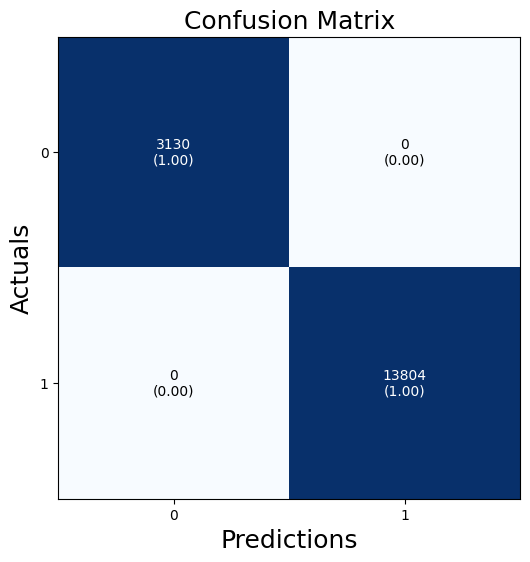


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3130
           1       1.00      1.00      1.00     13804

    accuracy                           1.00     16934
   macro avg       1.00      1.00      1.00     16934
weighted avg       1.00      1.00      1.00     16934



In [115]:
eval_metric(rf_count, X_train_count, y_train, X_test_count, y_test)

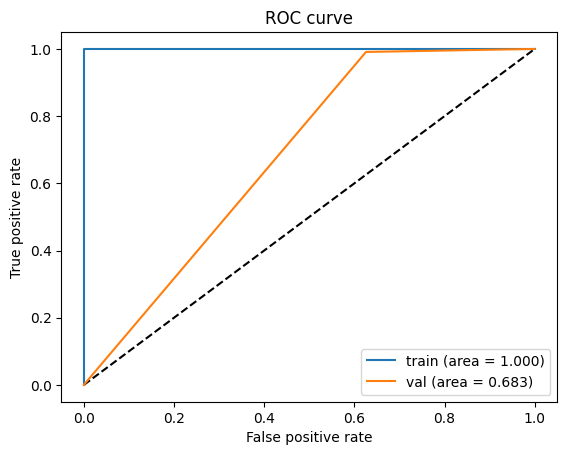

In [116]:
roc_auc_plot(rf_count, y_train, X_train_count, y_test, X_test_count)

In [117]:
y_pred = rf_count.predict(X_test_count)
y_pred_proba= rf_count.predict_proba(X_test_count)[:,1]

rf_AP_count = average_precision_score(y_test, y_pred_proba)
rf_count_rec = recall_score(y_test, y_pred)
rf_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [118]:
rf_tf= RandomForestClassifier()

In [119]:
rf_tf.fit(X_train_tf_idf, y_train)

RandomForestClassifier()

In [120]:
rf_scores_tf = eval_scores(rf_tf, X_train_tf_idf, y_train)
rf_scores_tf.mean()[2:]

test_accuracy      0.867072
train_accuracy     1.000000
test_precision     0.891204
train_precision    1.000000
test_recall        0.319808
train_recall       1.000000
test_f1            0.470370
train_f1           1.000000
dtype: float64

	Test_Set



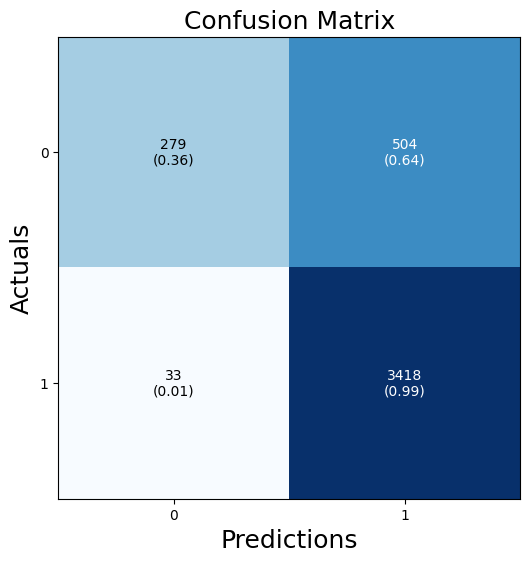

              precision    recall  f1-score   support

           0       0.89      0.36      0.51       783
           1       0.87      0.99      0.93      3451

    accuracy                           0.87      4234
   macro avg       0.88      0.67      0.72      4234
weighted avg       0.88      0.87      0.85      4234


	Train_Set



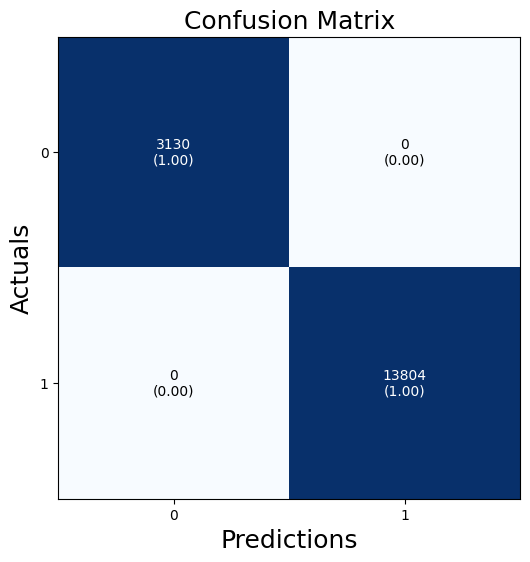


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3130
           1       1.00      1.00      1.00     13804

    accuracy                           1.00     16934
   macro avg       1.00      1.00      1.00     16934
weighted avg       1.00      1.00      1.00     16934



In [121]:
eval_metric(rf_tf, X_train_tf_idf, y_train, X_test_tf_idf, y_test)

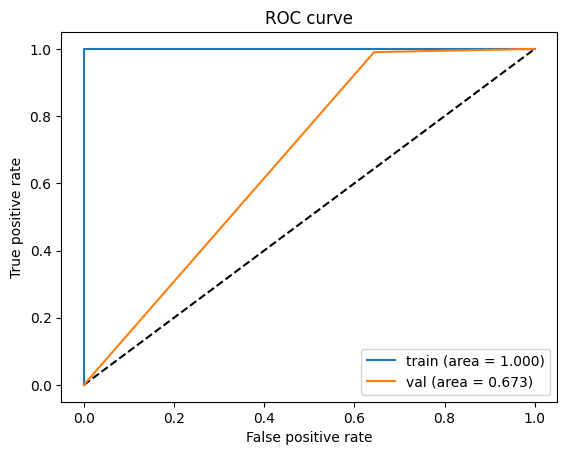

In [122]:
roc_auc_plot(rf_tf, y_train, X_train_tf_idf, y_test, X_test_tf_idf)

In [123]:
y_pred = rf_tf.predict(X_test_tf_idf)
y_pred_proba= rf_tf.predict_proba(X_test_tf_idf)[:,1]

rf_AP_tf = average_precision_score(y_test, y_pred_proba)
rf_tf_rec = recall_score(y_test, y_pred)
rf_td_f1 = f1_score(y_test,y_pred)

### Gridsearch

In [124]:
parameters_rf = [{'n_estimators': [100, 200, 300],
                  'max_depth': [4, 5, 6],
                  'min_samples_split': [2, 5, 10],
                  'min_samples_leaf': [1, 2, 4],
                  'class_weight': ['balanced', None]}]

rf_model_gs = RandomForestClassifier()
recall = make_scorer(recall_score,
                   average=None,
                   labels=[0])
grid_search_rf = HalvingGridSearchCV(rf_model_gs,
                                      parameters_rf,
                                      max_resources=20,
                                      scoring=recall,
                                      cv=5,
                                      n_jobs=-1,
                                      random_state=0)

grid_search_rf.fit(X_train_tf_idf, y_train)
best_accuracy_rf = grid_search_rf.best_score_
best_parameter_rf = grid_search_rf.best_params_
print("Best class 0 recall-score of RF: {:.2f} %".format(best_accuracy_rf.mean() * 100))
print("Best Parameter of RF:", best_parameter_rf)

Best class 0 recall-score of RF: 20.00 %
Best Parameter of RF: {'class_weight': 'balanced', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [125]:
rfg_scores_tf = eval_scores(grid_search_rf, X_train_tf_idf, y_train)
rfg_scores_tf.mean()[2:]

test_accuracy      0.831286
train_accuracy     0.846728
test_precision     0.528291
train_precision    0.555234
test_recall        0.830351
train_recall       0.871486
test_f1            0.645488
train_f1           0.678049
dtype: float64

	Test_Set



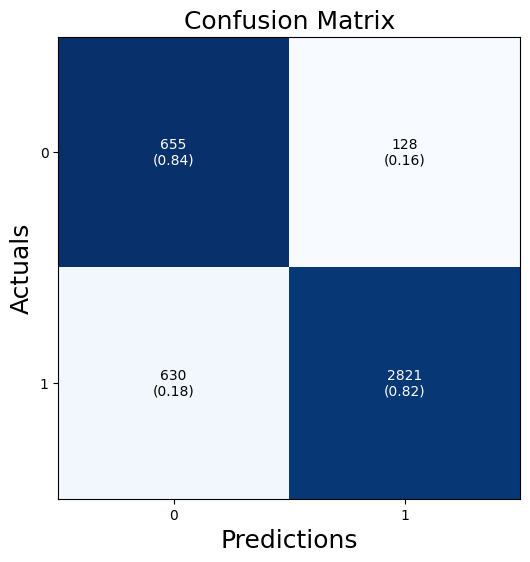

              precision    recall  f1-score   support

           0       0.51      0.84      0.63       783
           1       0.96      0.82      0.88      3451

    accuracy                           0.82      4234
   macro avg       0.73      0.83      0.76      4234
weighted avg       0.87      0.82      0.84      4234


	Train_Set



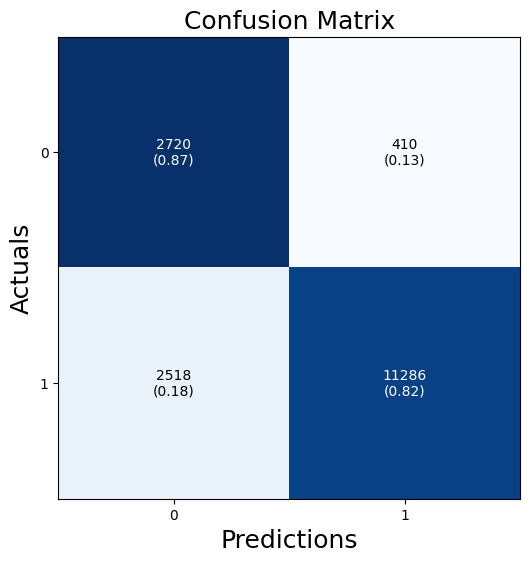


              precision    recall  f1-score   support

           0       0.52      0.87      0.65      3130
           1       0.96      0.82      0.89     13804

    accuracy                           0.83     16934
   macro avg       0.74      0.84      0.77     16934
weighted avg       0.88      0.83      0.84     16934



In [126]:
eval_metric(grid_search_rf, X_train_tf_idf, y_train, X_test_tf_idf, y_test)

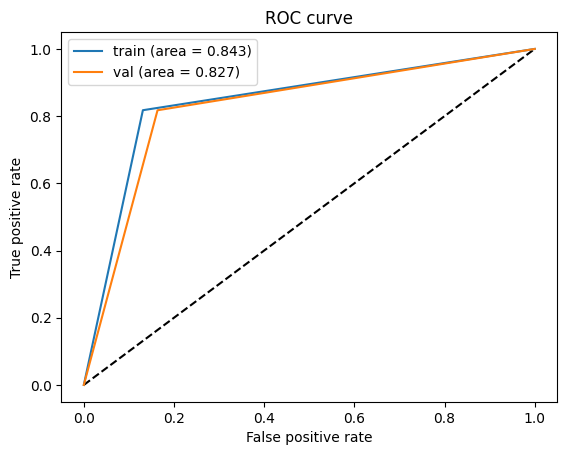

In [127]:
roc_auc_plot(grid_search_rf, y_train, X_train_tf_idf, y_test, X_test_tf_idf)

## Ada Boosting

### Countvectorizer

In [128]:
ada_count = AdaBoostClassifier()

In [129]:
ada_count.fit(X_train_count, y_train)

AdaBoostClassifier()

In [130]:
ada_scores = eval_scores(ada_count, X_train_count, y_train)
ada_scores.mean()[2:]

test_accuracy      0.871974
train_accuracy     0.876181
test_precision     0.720304
train_precision    0.734307
test_recall        0.502236
train_recall       0.517252
test_f1            0.591716
train_f1           0.606914
dtype: float64

	Test_Set



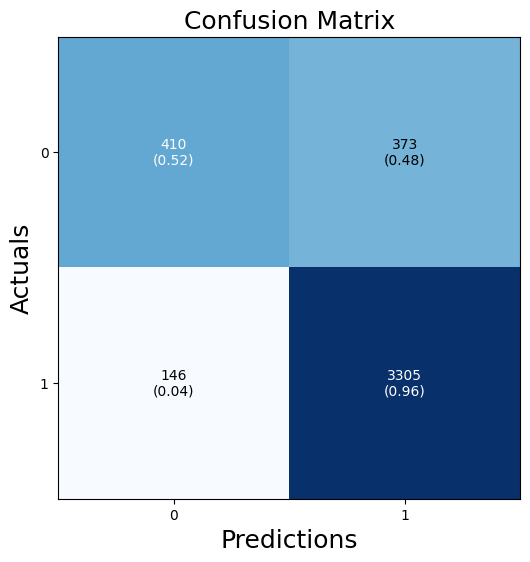

              precision    recall  f1-score   support

           0       0.74      0.52      0.61       783
           1       0.90      0.96      0.93      3451

    accuracy                           0.88      4234
   macro avg       0.82      0.74      0.77      4234
weighted avg       0.87      0.88      0.87      4234


	Train_Set



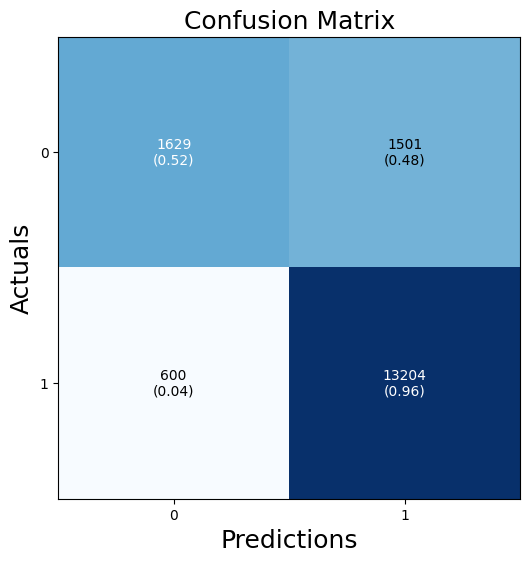


              precision    recall  f1-score   support

           0       0.73      0.52      0.61      3130
           1       0.90      0.96      0.93     13804

    accuracy                           0.88     16934
   macro avg       0.81      0.74      0.77     16934
weighted avg       0.87      0.88      0.87     16934



In [131]:
eval_metric(ada_count, X_train_count, y_train, X_test_count, y_test)

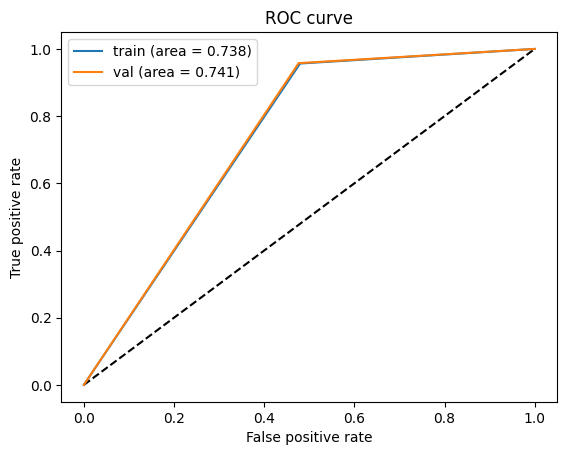

In [132]:
roc_auc_plot(ada_count, y_train, X_train_count, y_test, X_test_count)

In [133]:
y_pred = ada_count.predict(X_test_count)
y_pred_proba= ada_count.predict_proba(X_test_count)[:,1]

ada_AP_count = average_precision_score(y_test, y_pred_proba)
ada_count_rec = recall_score(y_test, y_pred)
ada_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [134]:
ada_tf= AdaBoostClassifier()

In [135]:
ada_tf.fit(X_train_tf_idf, y_train)

AdaBoostClassifier()

In [136]:
ada_scores_tf = eval_scores(ada_tf, X_train_tf_idf, y_train)
ada_scores_tf.mean()[2:]

test_accuracy      0.870497
train_accuracy     0.880315
test_precision     0.712373
train_precision    0.743439
test_recall        0.501597
train_recall       0.538259
test_f1            0.588522
train_f1           0.624407
dtype: float64

	Test_Set



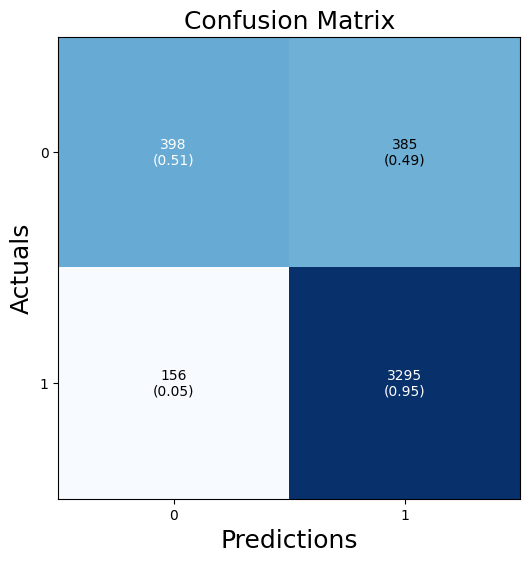

              precision    recall  f1-score   support

           0       0.72      0.51      0.60       783
           1       0.90      0.95      0.92      3451

    accuracy                           0.87      4234
   macro avg       0.81      0.73      0.76      4234
weighted avg       0.86      0.87      0.86      4234


	Train_Set



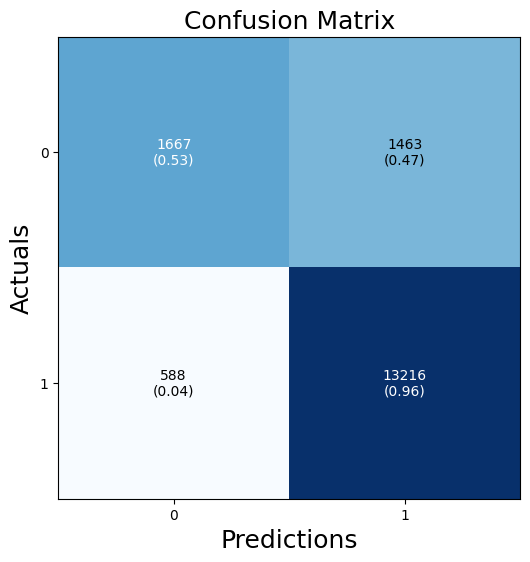


              precision    recall  f1-score   support

           0       0.74      0.53      0.62      3130
           1       0.90      0.96      0.93     13804

    accuracy                           0.88     16934
   macro avg       0.82      0.74      0.77     16934
weighted avg       0.87      0.88      0.87     16934



In [137]:
eval_metric(ada_tf, X_train_tf_idf, y_train, X_test_tf_idf, y_test)

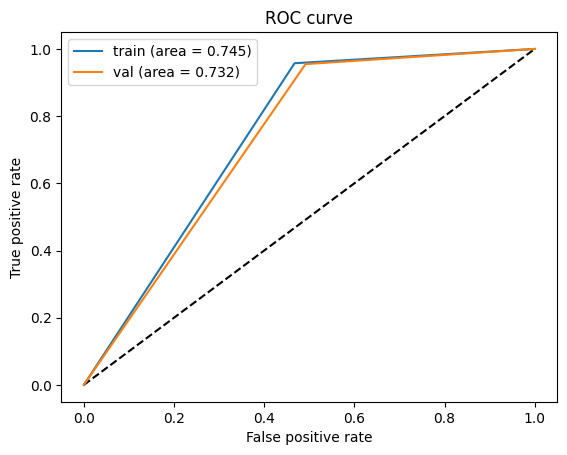

In [138]:
roc_auc_plot(ada_tf, y_train, X_train_tf_idf, y_test, X_test_tf_idf)

In [139]:
y_pred = ada_tf.predict(X_test_tf_idf)
y_pred_proba= ada_tf.predict_proba(X_test_tf_idf)[:,1]

ada_AP_tf = average_precision_score(y_test, y_pred_proba)
ada_tf_rec = recall_score(y_test, y_pred)
ada_td_f1 = f1_score(y_test,y_pred)

## DL modeling

In [140]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from keras.regularizers import l2

In [141]:
df2 = df.copy()
df2.head()

,text,recommend
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [142]:
df2.shape

(21168, 2)

### Tokenization

In [143]:
X = df2["text"]
y = df2["recommend"]
df2

,text,recommend
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
...,...,...
21170,I was surprised at the positive reviews for th...,0
21171,So i wasn't sure about ordering this skirt bec...,1
21172,I was very happy to snag this dress at such a ...,1
21173,"This fit well, but the top was very see throug...",0


In [144]:
num_words = 15000

tokenizer = Tokenizer(num_words = num_words)

In [145]:
tokenizer.fit_on_texts(X)

### Creating word index

In [146]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'so': 15,
 'was': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'are': 26,
 'fit': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'wear': 31,
 'me': 32,
 "it's": 33,
 'great': 34,
 'or': 35,
 'too': 36,
 "i'm": 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'they': 41,
 'up': 42,
 'would': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'more': 49,
 'perfect': 50,
 'really': 51,
 'little': 52,
 'ordered': 53,
 'if': 54,
 'these': 55,
 'will': 56,
 'one': 57,
 'flattering': 58,
 'soft': 59,
 'well': 60,
 'an': 61,
 'out': 62,
 'can': 63,
 'comfortable': 64,
 'back': 65,
 'because': 66,
 'had': 67,
 'bought': 68,
 '\r': 69,
 'nice': 70,
 'cute': 71,
 'beautiful': 72,
 'than': 73,
 'fits': 74,
 'looks': 75,
 'all': 76,
 'when': 77,
 'bit': 78,
 'down': 79,


In [147]:
len(tokenizer.word_index)

14389

### Converting tokens to numeric

In [148]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [149]:
X[100]

'The shirt is exactly as it is pictured, i have the burnt orange color and love it! i received numerous compliments both paired with jeans and tucked into a fun skirt. it fits true to size, as i normally wear a small in all retailer however it is the slightest bit tight in the shoulders. i would give this top a 5/5.'

In [150]:
X_num_tokens[100]

[1,
 80,
 6,
 473,
 30,
 5,
 6,
 390,
 2,
 24,
 1,
 1908,
 486,
 47,
 3,
 21,
 5,
 2,
 238,
 2140,
 198,
 190,
 545,
 14,
 90,
 3,
 870,
 311,
 4,
 276,
 108,
 5,
 74,
 124,
 8,
 22,
 30,
 2,
 240,
 31,
 4,
 46,
 9,
 76,
 102,
 151,
 5,
 6,
 1,
 2848,
 78,
 149,
 9,
 1,
 204,
 2,
 43,
 318,
 7,
 25,
 4,
 264,
 264]

### Maximum number of tokens for all documents¶

In [151]:
len(X_num_tokens[100])

63

In [152]:
len(X_num_tokens[106])

12

In [153]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [154]:
X_num_tokens

[[248, 514, 906, 3, 636, 3, 64],
 [21,
  7,
  18,
  33,
  1689,
  101,
  2,
  1314,
  8,
  220,
  5,
  9,
  4,
  105,
  3,
  37,
  299,
  2,
  131,
  1287,
  2,
  423,
  43,
  24,
  53,
  5,
  135,
  1287,
  33,
  94,
  2,
  68,
  4,
  94,
  3,
  38,
  502,
  2,
  21,
  1,
  85,
  11,
  32,
  409,
  39,
  4,
  52,
  455,
  1,
  389,
  43,
  153,
  29,
  4,
  124,
  1315,
  11,
  476,
  445,
  6,
  770,
  94],
 [2,
  67,
  314,
  175,
  1105,
  12,
  7,
  18,
  3,
  51,
  206,
  5,
  8,
  103,
  12,
  32,
  2,
  1135,
  53,
  1,
  94,
  46,
  17,
  236,
  22,
  10,
  2,
  219,
  7,
  8,
  29,
  6480,
  46,
  15,
  46,
  9,
  652,
  20,
  2,
  117,
  19,
  787,
  5,
  42,
  2,
  2218,
  5,
  9,
  94,
  97,
  81,
  16,
  39,
  677,
  256,
  1,
  25,
  680,
  16,
  64,
  3,
  27,
  257,
  10,
  1,
  174,
  680,
  67,
  4,
  23,
  149,
  278,
  470,
  3,
  518,
  718,
  488,
  4453,
  150,
  962,
  1875,
  4,
  1966,
  145,
  1536,
  16,
  1,
  4453,
  150,
  470,
  847,
  3153,
  311,
  1,

In [155]:
num_tokens

array([ 7, 62, 97, ..., 28, 42, 19])

In [156]:
num_tokens.mean()

60.23540249433107

In [157]:
num_tokens.max()

116

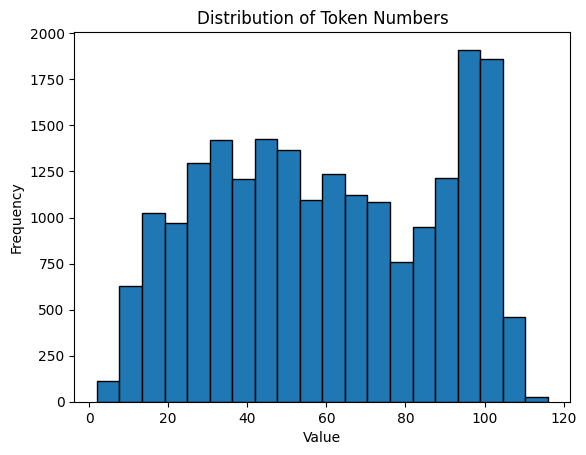

In [158]:
plt.hist(num_tokens, bins=20, edgecolor='black')  # Adjust the number of bins as needed
plt.title("Distribution of Token Numbers")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [159]:
max_tokens = 116

In [160]:
sum(num_tokens <= max_tokens) / len(num_tokens)

1.0

In [161]:
sum(num_tokens <= max_tokens)

21168

In [162]:
len(num_tokens)

21168

### Fixing token counts of all documents (pad_sequences)

In [163]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens)

In [164]:
X_pad.shape

(21168, 116)

In [165]:
X_num_tokens[501]

[929,
 1,
 1570,
 226,
 11,
 7,
 18,
 43,
 189,
 476,
 19,
 113,
 5,
 44,
 76,
 5,
 6,
 124,
 8,
 22,
 37,
 4,
 179,
 3,
 1,
 1430,
 27,
 30,
 4,
 846,
 11,
 32,
 1,
 83,
 6,
 19,
 44,
 76,
 650,
 2,
 288,
 2225,
 5,
 16,
 4,
 78,
 49,
 904,
 10,
 20,
 128,
 1185,
 32,
 2,
 16,
 418,
 8,
 730,
 1,
 472,
 244,
 564,
 37,
 441,
 5591,
 3674,
 1,
 25,
 306,
 4146,
 8,
 32,
 30,
 60,
 2,
 126,
 1421,
 564,
 1919,
 28,
 8402,
 10,
 2,
 24,
 243,
 1,
 18,
 142,
 19,
 189,
 32,
 144,
 584,
 44,
 76,
 1,
 114,
 79,
 215,
 6,
 20,
 5,
 75,
 49,
 8403]

In [166]:
X_pad[501]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
        929,    1, 1570,  226,   11,    7,   18,   43,  189,  476,   19,
        113,    5,   44,   76,    5,    6,  124,    8,   22,   37,    4,
        179,    3,    1, 1430,   27,   30,    4,  846,   11,   32,    1,
         83,    6,   19,   44,   76,  650,    2,  288, 2225,    5,   16,
          4,   78,   49,  904,   10,   20,  128, 1185,   32,    2,   16,
        418,    8,  730,    1,  472,  244,  564,   37,  441, 5591, 3674,
          1,   25,  306, 4146,    8,   32,   30,   60,    2,  126, 1421,
        564, 1919,   28, 8402,   10,    2,   24,  243,    1,   18,  142,
         19,  189,   32,  144,  584,   44,   76,    1,  114,   79,  215,
          6,   20,    5,   75,   49, 8403], dtype=int32)

In [167]:
np.argmax(num_tokens)

15208

In [168]:
np.array(X_num_tokens[785])

array([ 477,    6,    5,   15,  875,    8,  220,    4,   80,   20,  210,
       3202,  680,   13,   17,  229,   54,    2, 1844,   17,  432,   69,
         69,    7,    6,   71, 1329,    1,  432,  960,  457,   10, 2178,
        181,   65])

In [169]:
X_pad[785]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,  477,    6,    5,   15,  875,    8,  220,
          4,   80,   20,  210, 3202,  680,   13,   17,  229,   54,    2,
       1844,   17,  432,   69,   69,    7,    6,   71, 1329,    1,  432,
        960,  457,   10, 2178,  181,   65], dtype=int32)

### Train Set Split

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X_pad,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

In [171]:
X_train_v, X_val, y_train_v, y_val = train_test_split(X_train,
                                                      y_train,
                                                      test_size = 0.1,
                                                      stratify = y_train,
                                                      random_state = 42)

In [172]:
X_train.shape

(16934, 116)

In [173]:
X_test.shape

(4234, 116)

In [174]:
X_val.shape

(1694, 116)

### Modeling

In [175]:
model_dl = Sequential()

In [176]:
embedding_size = 50

In [177]:
model_dl.add(Embedding(input_dim=num_words,
                       output_dim=embedding_size,
                       input_length=max_tokens))
model_dl.add(Dropout(0.3))

model_dl.add(GRU(units=50, return_sequences=True, kernel_regularizer=l2(0.001)))
model_dl.add(Dropout(0.3))

model_dl.add(GRU(units=25, return_sequences=True, kernel_regularizer=l2(0.001)))
model_dl.add(Dropout(0.3))

model_dl.add(GRU(units=12))
model_dl.add(Dropout(0.3))

model_dl.add(Dense(1, activation='sigmoid'))

In [178]:
#optimizer = Adam(learning_rate=0.008)

In [179]:
model_dl.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['Recall'])

In [180]:
model_dl.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 116, 50)           750000    
                                                                 
 dropout (Dropout)           (None, 116, 50)           0         
                                                                 
 gru (GRU)                   (None, 116, 50)           15300     
                                                                 
 dropout_1 (Dropout)         (None, 116, 50)           0         
                                                                 
 gru_1 (GRU)                 (None, 116, 25)           5775      
                                                                 
 dropout_2 (Dropout)         (None, 116, 25)           0         
                                                                 
 gru_2 (GRU)                 (None, 12)                1

In [181]:
early_stop = EarlyStopping(monitor="val_recall", mode="max", verbose=1,
                           patience = 2, restore_best_weights=True)

In [182]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.Series(classes_weights).unique()

array([2.70511182, 0.61337294])

In [183]:
model_dl.fit(X_train,
          y_train,
          epochs=15,
          batch_size=128,
          sample_weight = classes_weights,
          validation_data = (X_val, y_val),
          callbacks=[early_stop])

Epoch 1/15
133/133 [==============================] - 29s 150ms/step - loss: 0.5943 - recall: 0.6834 - val_loss: 0.3666 - val_recall: 0.8407
Epoch 2/15
133/133 [==============================] - 19s 139ms/step - loss: 0.3019 - recall: 0.8789 - val_loss: 0.2340 - val_recall: 0.9059
Epoch 3/15
133/133 [==============================] - 19s 140ms/step - loss: 0.2298 - recall: 0.9076 - val_loss: 0.2884 - val_recall: 0.8747
Epoch 4/15
133/133 [==============================] - 19s 140ms/step - loss: 0.1866 - recall: 0.9262 - val_loss: 0.1754 - val_recall: 0.9312
Epoch 5/15
133/133 [==============================] - 19s 141ms/step - loss: 0.1645 - recall: 0.9353 - val_loss: 0.1525 - val_recall: 0.9406
Epoch 6/15
133/133 [==============================] - 19s 140ms/step - loss: 0.1523 - recall: 0.9413 - val_loss: 0.1826 - val_recall: 0.9261
Epoch 7/15
133/133 [==============================] - 18s 138ms/step - loss: 0.1327 - recall: 0.9504 - val_loss: 0.1115 - val_recall: 0.9587
Epoch 8/15
13

### Model Evaluation

In [184]:
model_loss = pd.DataFrame(model_dl.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.594317,0.683353,0.366609,0.840695
1,0.301917,0.878876,0.234036,0.905865
2,0.229817,0.907563,0.288411,0.874728
3,0.186615,0.926181,0.175378,0.931209
4,0.164517,0.935309,0.152470,0.940623


<Axes: >

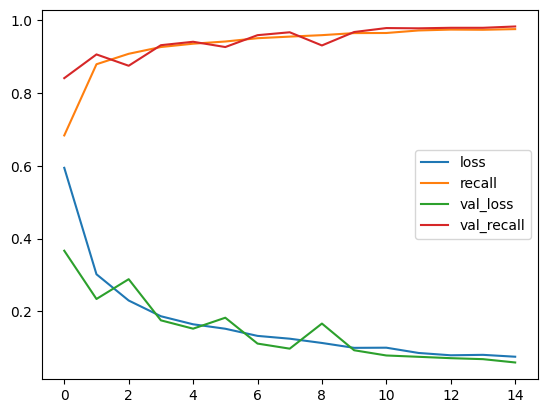

In [185]:
model_loss.plot()

In [186]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_train_pred = model_dl.predict(X_train) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

y_pred = model_dl.predict(X_test) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

530/530 [==============================] - 11s 20ms/step
[[ 3120    10]
 [  195 13609]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3130
           1       1.00      0.99      0.99     13804

    accuracy                           0.99     16934
   macro avg       0.97      0.99      0.98     16934
weighted avg       0.99      0.99      0.99     16934

133/133 [==============================] - 3s 19ms/step
[[ 564  219]
 [ 216 3235]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.72      0.72      0.72       783
           1       0.94      0.94      0.94      3451

    accuracy                           0.90      4234
   macro avg       0.83      0.83      0.83      4234
weighted avg       0.90      0.90      0.90      4234



133/133 [==============================] - 3s 19ms/step


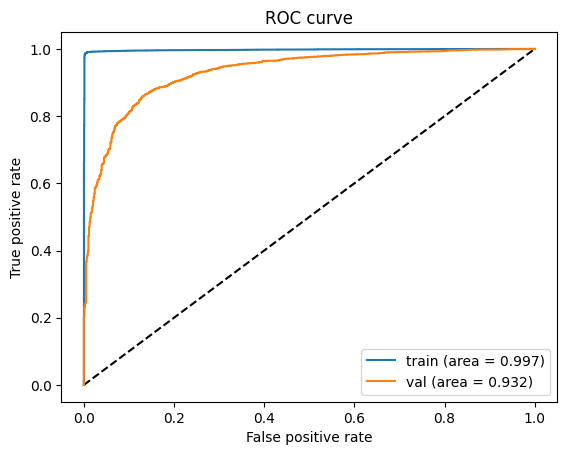

In [187]:
roc_auc_plot(model_dl, y_train, X_train, y_test, X_test)

In [188]:
average_precision_score(y_test, y_pred)

0.928988824792355

In [189]:
y_pred_proba = model_dl.predict(X_test)
DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)

133/133 [==============================] - 3s 19ms/step


## BERT Modeling

In [190]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 97.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 30.1 MB/s eta 0:00:00


In [191]:
!pip install -q tf-models-official

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.9/489.9 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 58.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 60.3 MB/s eta 0:00:00


### Read Data

In [192]:
df_BERT = df.copy()
df_BERT

,text,recommend
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
...,...,...
21170,I was surprised at the positive reviews for th...,0
21171,So i wasn't sure about ordering this skirt bec...,1
21172,I was very happy to snag this dress at such a ...,1
21173,"This fit well, but the top was very see throug...",0


In [193]:
df_BERT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21168 entries, 0 to 21174
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       21168 non-null  object
 1   recommend  21168 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1012.2+ KB


In [194]:
df_BERT.shape

(21168, 2)

In [195]:
sum(df_BERT.duplicated())

0

In [196]:
df_BERT.isnull().sum()

text         0
recommend    0
dtype: int64

In [197]:
df_BERT.recommend.value_counts(normalize=True)

1    0.815146
0    0.184854
Name: recommend, dtype: float64

### Train test split

In [198]:
X=df_BERT["text"]
y=df_BERT["recommend"]

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.1,
                                                    stratify=y,
                                                    random_state=42)

### Tokenization

In [200]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

In [201]:
tokenizer.vocab

OrderedDict([('[PAD]', 0),
             ('[unused1]', 1),
             ('[unused2]', 2),
             ('[unused3]', 3),
             ('[unused4]', 4),
             ('[unused5]', 5),
             ('[unused6]', 6),
             ('[unused7]', 7),
             ('[unused8]', 8),
             ('[unused9]', 9),
             ('[unused10]', 10),
             ('[unused11]', 11),
             ('[unused12]', 12),
             ('[unused13]', 13),
             ('[unused14]', 14),
             ('[unused15]', 15),
             ('[unused16]', 16),
             ('[unused17]', 17),
             ('[unused18]', 18),
             ('[unused19]', 19),
             ('[unused20]', 20),
             ('[unused21]', 21),
             ('[unused22]', 22),
             ('[unused23]', 23),
             ('[unused24]', 24),
             ('[unused25]', 25),
             ('[unused26]', 26),
             ('[unused27]', 27),
             ('[unused28]', 28),
             ('[unused29]', 29),
             ('[unused30]', 30),
 

In [202]:
print(len(tokenizer.vocab))

28996


### Fixing token counts of all documents

In [203]:
# For every sentence...
number_tokens_sentences = []
for sent in X:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.

    input_ids = tokenizer.encode(sent, add_special_tokens=True)
    number_tokens_sentences.append(len(input_ids))

print('Max sentence length: ', max(number_tokens_sentences))


Max sentence length:  164


In [204]:
np.array(number_tokens_sentences).mean()

77.58772675736961

In [205]:
sum(np.array(number_tokens_sentences) <=  162) / len(number_tokens_sentences)

0.9999527588813303

### Transformation Vectors to Matrices

In [206]:
def transformation(X):
  seq_len = 162

  Xids = []
  Xmask = []


  for text in X:

      tokens = tokenizer.encode_plus(text, max_length=seq_len, truncation=True,
                                      padding='max_length', add_special_tokens=True)

      Xids.append(tokens['input_ids'])
      Xmask.append(tokens['attention_mask'])


  return np.array(Xids), np.array(Xmask)

In [207]:
Xids_train, Xmask_train = transformation(X_train)
Xids_test, Xmask_test = transformation(X_test)


In [208]:
Xids_train

array([[  101,  3198, 10509, ...,     0,     0,     0],
       [  101,  1636,  1962, ...,     0,     0,     0],
       [  101,   146,  1138, ...,     0,     0,     0],
       ...,
       [  101,   146,  1567, ...,     0,     0,     0],
       [  101,   146,  1148, ...,     0,     0,     0],
       [  101,   146,   112, ...,     0,     0,     0]])

In [209]:
print("Xids_train.shape  :", Xids_train.shape)
print("Xmask_train.shape :", Xmask_train.shape)
print("Xids_test.shape   :", Xids_test.shape)
print("Xmask_test.shape  :", Xmask_test.shape)

Xids_train.shape  : (19051, 162)
Xmask_train.shape : (19051, 162)
Xids_test.shape   : (2117, 162)
Xmask_test.shape  : (2117, 162)


In [210]:
y_trainr = y_train.values.reshape(-1, 1)

In [211]:
y_testr = y_test.values.reshape(-1, 1)

### Transformation Matrix to Tensorflow tensor

In [212]:
import tensorflow as tf

dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train, Xmask_train, y_trainr))
dataset_train

<_TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [213]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test, Xmask_test, y_testr))
dataset_test

<_TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [214]:
def map_func(Tensor_Xids, Tensor_Xmask, Tensor_labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Tensor_Xids, 'attention_mask': Tensor_Xmask}, Tensor_labels

In [215]:
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func)

In [216]:
dataset_train

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [217]:
dataset_test

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

### Batch Size

In [218]:
batch_size = 32

train_ds = dataset_train.batch(batch_size)
val_ds = dataset_test.batch(batch_size)


In [219]:
train_ds

<_BatchDataset element_spec=({'input_ids': TensorSpec(shape=(None, 162), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(None, 162), dtype=tf.int64, name=None)}, TensorSpec(shape=(None, 1), dtype=tf.int64, name=None))>

In [220]:
len(X_train)/16

1190.6875

In [221]:
print(len(train_ds))
print(len(train_ds)*3)
print(int(0.1*len(train_ds)*3))

596
1788
178


### Creating optimization

In [222]:
from official.nlp import optimization
epochs = 2
#batch_size = 16
steps_per_epoch = len(train_ds)

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 2e-5  # 3e-5, 5e-5
optimizer= optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')


### Creating Model with TPU

In [223]:
def create_binary_model():
    from transformers import TFBertModel

    model_BERT = TFBertModel.from_pretrained("bert-base-uncased")

    input_ids = tf.keras.layers.Input(shape=(162,), name='input_ids', dtype='int32')
    attention_mask = tf.keras.layers.Input(shape=(162,), name='attention_mask', dtype='int32')

    embeddings = model_BERT.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"]

    x = tf.keras.layers.Dense(80, activation='relu')(embeddings)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.1)(x)

    # Modify output layer for binary classification
    output = tf.keras.layers.Dense(1, activation='sigmoid', name='binary_output')(x)

    return tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

# Create the binary classification model
binary_model = create_binary_model()


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [224]:
with strategy.scope():
    # Your model and training code here
    optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
    loss = tf.keras.losses.BinaryCrossentropy()
    recall = tf.keras.metrics.Recall()
    model_BERT = create_binary_model()
    model_BERT.compile(optimizer=optimizer, loss=loss, metrics=[recall])


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [225]:
model_BERT.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 162)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 162)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 162,                                         

### Model Fiting

In [226]:
model_BERT.fit(train_ds, validation_data= val_ds, epochs=epochs)

Epoch 1/2
596/596 [==============================] - 206s 193ms/step - loss: 0.6153 - recall: 0.6327 - val_loss: 0.3639 - val_recall: 0.9270
Epoch 2/2
596/596 [==============================] - 60s 101ms/step - loss: 0.5003 - recall: 0.7726 - val_loss: 0.3233 - val_recall: 0.9415


### Model evaluation

In [227]:
model_loss = pd.DataFrame(model_BERT.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.615251,0.632687,0.363922,0.926999
1,0.500340,0.772619,0.323314,0.941483


<Axes: >

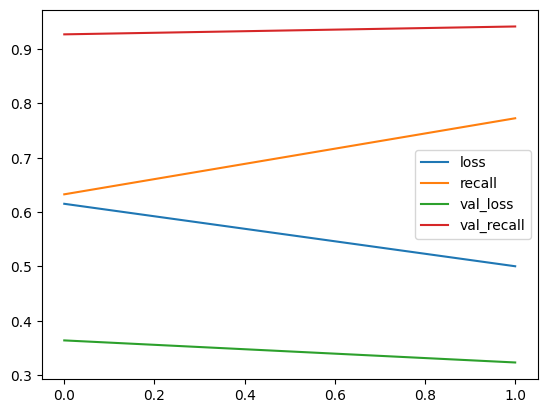

In [228]:
model_loss.plot()

In [229]:
model_BERT.evaluate(train_ds)

596/596 [==============================] - 21s 33ms/step - loss: 0.2518 - recall: 0.9644


[0.25183263421058655, 0.9643892049789429]

In [230]:
model_BERT.evaluate(val_ds)

67/67 [==============================] - 3s 35ms/step - loss: 0.3233 - recall: 0.9415


[0.3233141303062439, 0.941483199596405]

In [231]:
y_pred = model_BERT.predict(val_ds)

67/67 [==============================] - 19s 158ms/step


In [232]:
 y_prediction = [1 if prob >= 0.5 else 0 for prob in y_pred]
 y_prediction[:20]

[1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]

In [233]:
y_pred_train = model_BERT.predict(train_ds)

596/596 [==============================] - 17s 27ms/step


In [234]:
y_prediction_train = [1 if prob >= 0.5 else 0 for prob in y_pred_train]
y_prediction_train[:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [235]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score


print(confusion_matrix(y_train, y_prediction_train))
print("-------------------------------------------------------")
print(classification_report(y_train, y_prediction_train))

#y_pred = model_BERT.predict(X_testr) >= 0.5

print(confusion_matrix(y_test, y_prediction))
print("-------------------------------------------------------")
print(classification_report(y_test, y_prediction))

[[ 2994   528]
 [  553 14976]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      3522
           1       0.97      0.96      0.97     15529

    accuracy                           0.94     19051
   macro avg       0.91      0.91      0.91     19051
weighted avg       0.94      0.94      0.94     19051

[[ 294   97]
 [ 101 1625]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.75      0.75       391
           1       0.94      0.94      0.94      1726

    accuracy                           0.91      2117
   macro avg       0.84      0.85      0.85      2117
weighted avg       0.91      0.91      0.91      2117



67/67 [==============================] - 3s 29ms/step


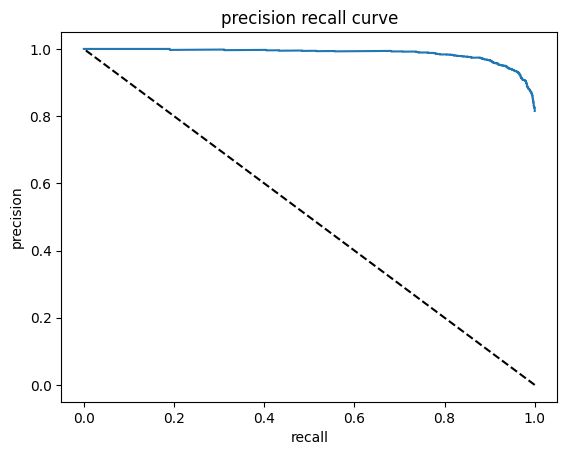

In [236]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
y_pred_proba = model_BERT.predict(val_ds)
precision, recall, thresholds = precision_recall_curve( y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision recall curve')
plt.show()

In [237]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_proba)

0.9479541123719375

In [238]:
average_precision_score(y_test, y_pred_proba)

0.986923263650815

In [239]:
BERT_AP = average_precision_score(y_test, y_pred)
BERT_f1 = f1_score(y_test, y_prediction)
BERT_rec = recall_score(y_test, y_prediction)

### Compare Models F1 Scores, Recall Scores and Average Precision Score

In [240]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count",
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf",
                                  "Random Forest_tfidf", "AdaBoost_tfidf", "DL", "BERT"],
                        "F1_Score": [nb_count_f1, log_count_f1, svm_count_f1, rf_count_f1, ada_count_f1, nb_td_f1,
                                     log_td_f1, svm_td_f1, rf_td_f1, ada_td_f1, DL_f1, BERT_f1],

                        "Recall_Score": [nb_count_rec, log_count_rec, svm_count_rec, rf_count_rec, ada_count_rec, nb_tf_rec,
                                         log_tf_rec, svm_tf_rec, rf_tf_rec, ada_tf_rec, DL_rec, BERT_rec],

                        "Average_Precision_Score": [nb_AP_count, log_AP_count, svm_AP_count, rf_AP_count, ada_AP_count, nb_AP_tf,
                                                    log_AP_tf, svm_AP_tf, rf_AP_tf, ada_AP_tf, DL_AP, BERT_AP]})
compare

,Model,F1_Score,Recall_Score,Average_Precision_Score
0,NaiveBayes_count,0.937683,0.928716,0.987104
1,LogReg_count,0.943913,0.958273,0.984727
2,SVM_count,0.942693,0.974790,0.987104
3,Random Forest_count,0.929222,0.991017,0.980729
4,AdaBoost_count,0.927199,0.957693,0.972334
5,NaiveBayes_tfidf,0.937683,0.928716,0.987104
6,LogReg_tfidf,0.942413,0.974500,0.988158
7,SVM_tfidf,0.943624,0.972472,0.987104
8,Random Forest_tfidf,0.927167,0.990438,0.983755
9,AdaBoost_tfidf,0.924134,0.954796,0.970613


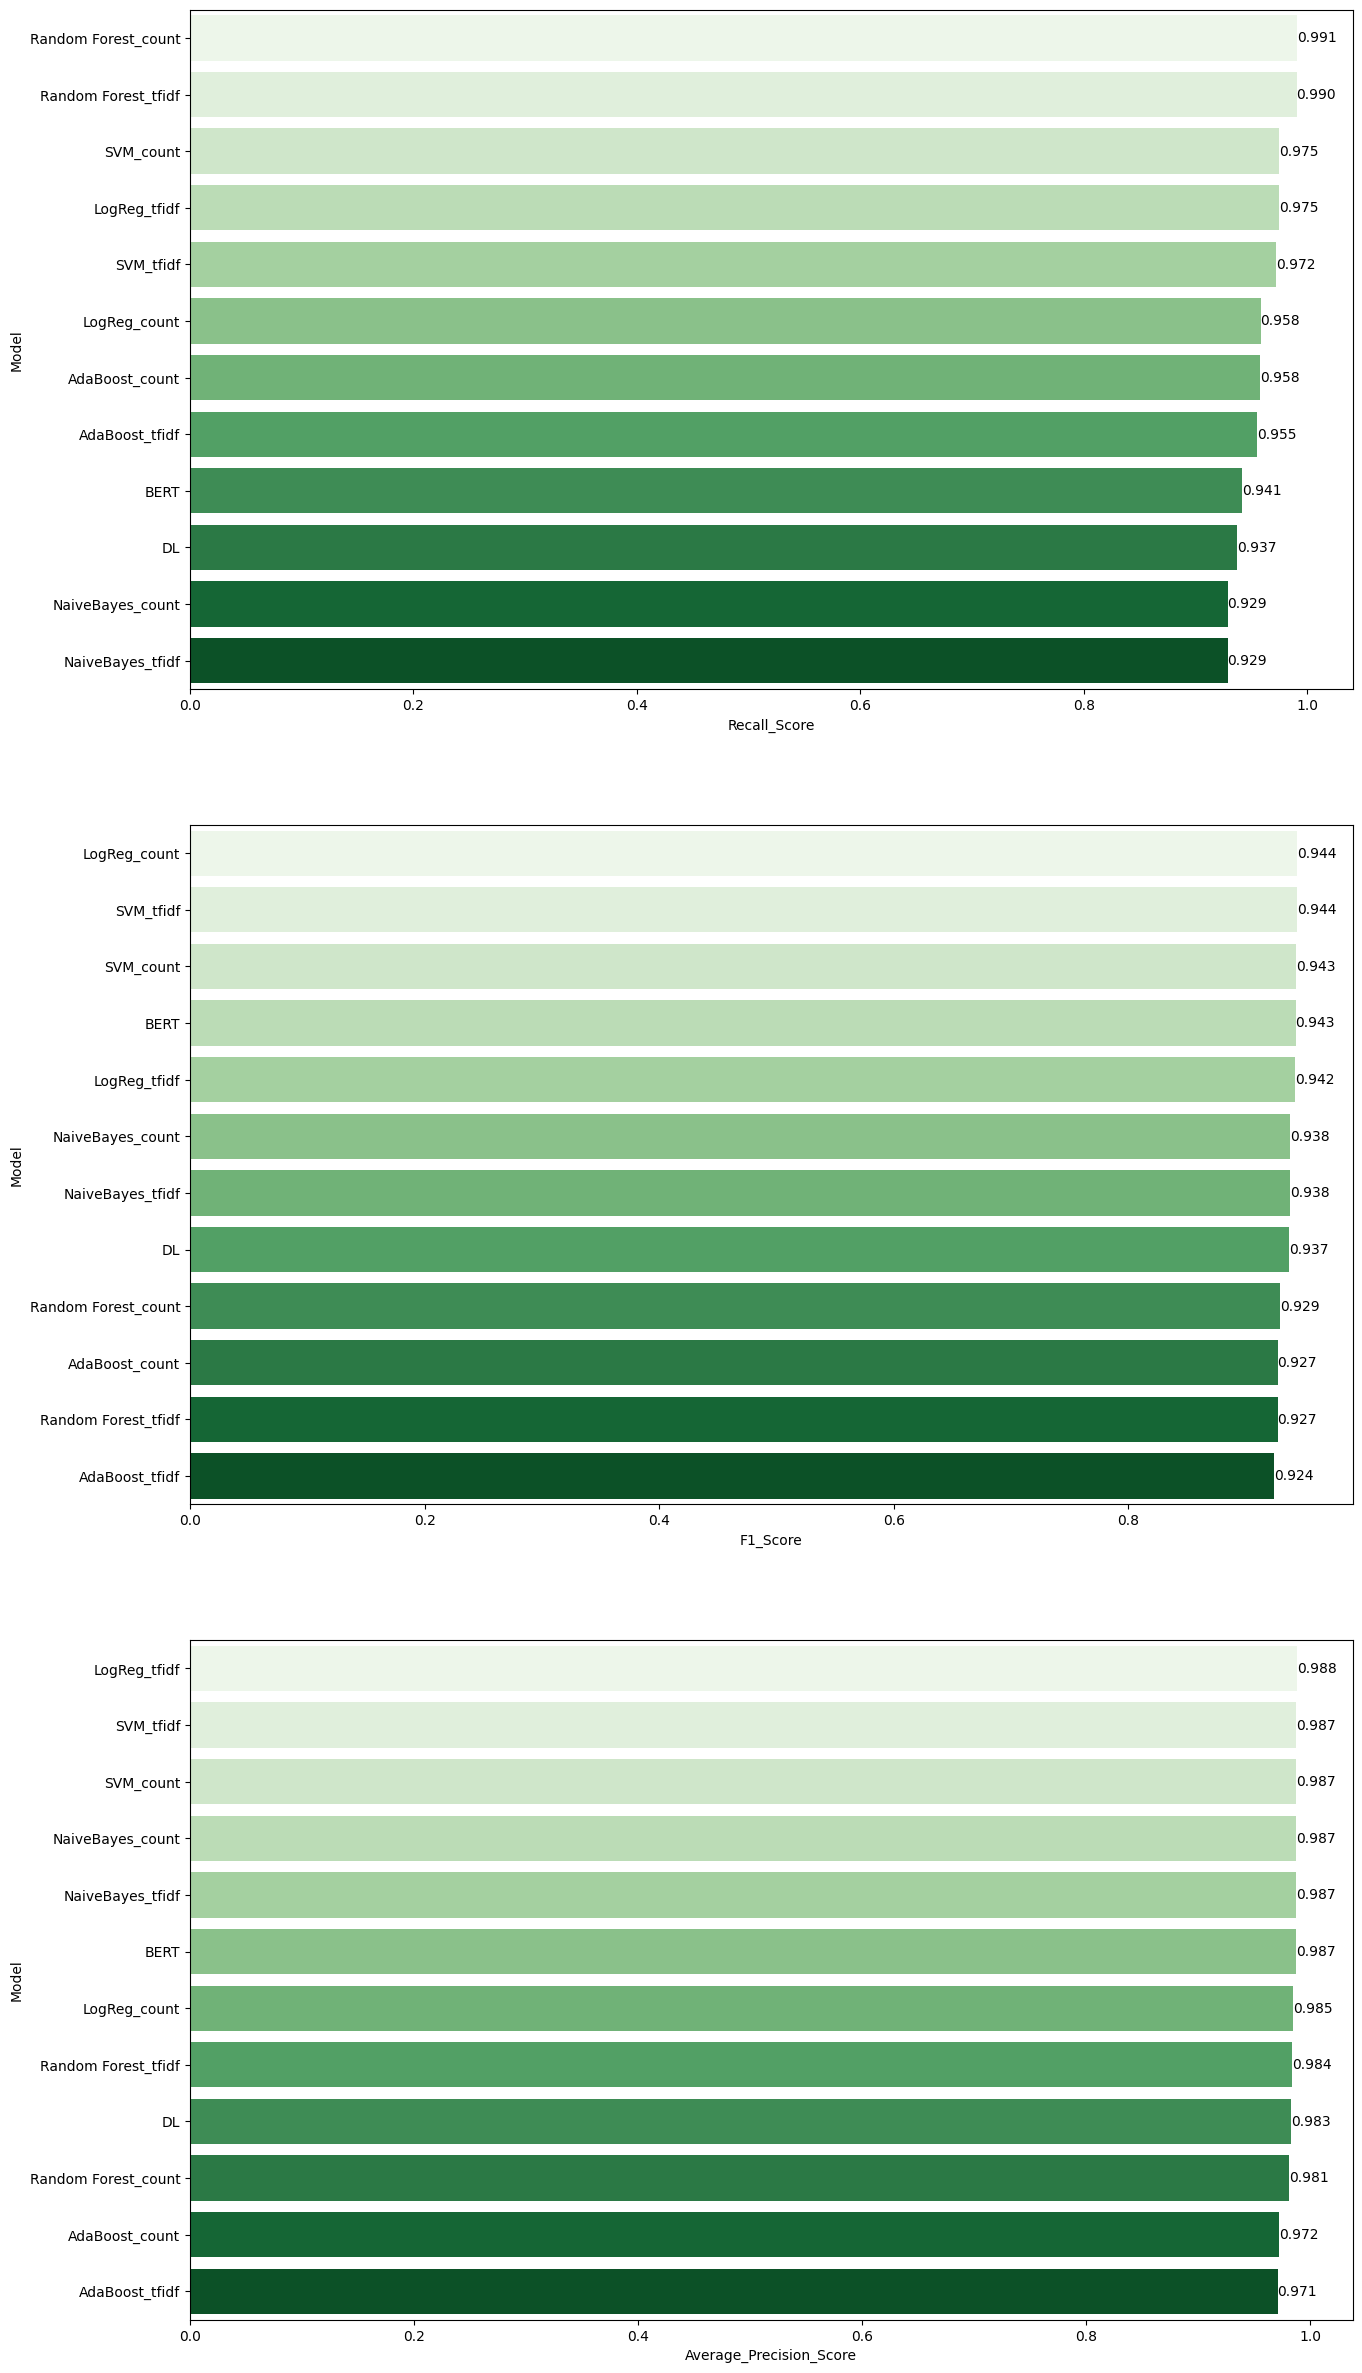

In [241]:
plt.figure(figsize=(15,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score", ascending=False)
ax=sns.barplot(x="Recall_Score", y="Model", data=compare, palette="Greens")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="Greens")
ax.bar_label(ax.containers[0],fmt="%.3f")


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score", ascending=False)
ax=sns.barplot(x="Average_Precision_Score", y="Model", data=compare, palette="Greens")
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.show();


### Conclusion

Upon reviewing the scores in the Compare section, it becomes evident that they are generally nearby. However, it's noteworthy that the Logistic Regression model and SVM notably distinguish themselves in F1 and AP scores. Moreover, Random Forest performs well in the Recall score.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___